In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
dataset = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [300]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [301]:
dataset.shape

(10886, 12)

In [302]:
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# Features Description

The dataset is composed of 10,886 entries, each with 12 attributes as described below:
1. datetime: The date and time of the observation.
2. season: Numerically coded as 1 for spring, 2 for summer, 3 for fall, and 4 for winter.
3. holiday: This indicates if the day is a public holiday as per the calendar found at http://chr.dc.gov/page/holiday-schedule.
4. workingday: This is marked as 1 if the day is neither a weekend nor a holiday; otherwise, it is O
5. weather: Categorized into four types:
• Clear or partly cloudy skies.
• Misty conditions which may include cloudy or broken clouds.
• Light precipitation events such as snow or light rain, possibly with thunderstorms and scattered clouds.
• Severe weather conditions like heavy rain with ice pellets, thunderstorms, mist, or snow accompanied by fog.
6. temp: The air temperature in degrees Celsius.
7. atemp: The 'feels like' temperature in degrees Celsius.
8. humidity: The humidity percentage.
9. windspeed: The speed of the wind.
10. casual: The number of non-registered user rentals.
11. registered: The number of registered user rentals.
12. count: The total number of bikes rented, including both casual and registered users.

In [303]:
dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [304]:
# converting datetime from object to datetime
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

In [305]:
dataset.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [306]:
dataset.duplicated().sum()

0

In [307]:
for i in dataset.columns:
  print(i, ':', dataset[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


# Observations

Season, holiday, working day, and weather represent categorical or discrete variables. In contrast, the remaining features such as temperature, 'feels like' temperature, humidity, wind speed, and the counts of casual, registered, and total bike rentals are continuous variables.

In [308]:
dataset.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


# Observations

1. Half of the dataset entries were recorded during the autumn season, whereas three-quarters of the entries occurred in winter. Summer months saw notably fewer recordings.
2. There is a minimal presence of holiday-related data within the dataset.
3. Half of the entries are categorized as non-working days.
4. Regarding weather conditions, 75% of the data pertains to cloudy days, and 50% includes days that were clear or had few clouds.
5. The dataset shows a median temperature of 20.5 degrees Celsius, with the upper three-quarters reaching 26.24 degrees Celsius. The average temperature across all entries is approximately 20.36 degrees Celsius.
6. The 'feels like' temperature has a median value of 24.24 degrees Celsius, with 75% of readings up to 31.06 degrees Celsius. The overall average perceived temperature is around 23.65 degrees Celsius.
7. Humidity values show a median of 62%, and 75% of the entries record up to 77% humidity, with an average around 61.86%.
8. Wind speeds in the dataset have a median of 12.998, with the top three-quarters reaching up to
16.997. The average wind speed logged is 12.79.
9. Casual user data indicate a median of 17 users, going up to 49 users for the 75th percentile.
The average number of casual users stands at 36.02, with the highest recorded at 367.
10. For registered users, the median count is 118, with the top three-quarters of the data showing up to 222 users. The average number of registered users is 155.552, with a maximum of 886.
11. Total users, combining both casual and registered, show a median count of 145, with the 75th percentile at 284. The average total count is 191.574, and the maximum reaches 977.

In [309]:
dataset['season'].value_counts(normalize=True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

# Observations

The dataset features approximately an equal number of data points for each season.

In [310]:
dataset['holiday'].value_counts(normalize=True)

holiday
0    0.971431
1    0.028569
Name: proportion, dtype: float64

# Observations

Most of the data is gathered on non-holiday days, likely because many people use the service during their regular routines rather than on holidays.









In [311]:
dataset['workingday'].value_counts(normalize=True)

workingday
1    0.680875
0    0.319125
Name: proportion, dtype: float64

# Observations

Around 68% of the dataset entries correspond to working days, which is logical given the higher reliance on public transportation during these days.








In [312]:
dataset['weather'].value_counts(normalize=True)

weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: proportion, dtype: float64

# Observations

1. Weather conditions featuring clear or partly cloudy skies account for 66% of the data, whereas misty or cloudy conditions make up 26%.
2. There are minimal data entries recorded during light snow or light rain; likely due to fewer people opting to use the service in heavy rain or thunderstorms, which is understandable.

In [313]:
dataset['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

# Observations

1. The mean temperature across the dataset is 20.23 degrees Celsius, with the median temperature also being 20.5 degrees Celsius.
2. Temperatures ranged from a low of 0.82 degrees Celsius up to a high of 41 degrees Celsius.

In [314]:
dataset['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

# Observations

1. The average perceived temperature across the dataset stands at 23.65 degrees Celsius, with the median 'feels like' temperature recorded at 24.24 degrees Celsius.
2. The range for the 'feels like' temperature spans from a minimum of 0.76 degrees Celsius to a
maximum of 45.45 degrees Celsius.

In [315]:
dataset['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

# Observations

1. The average wind speed recorded across the dataset is 12.8, with the median wind speed being
12.998.
2. Wind speeds in the dataset varied from a calm 0 to a high of 56.996.

In [316]:
dataset['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

# Observations

1. The mean humidity level across the dataset was 61.886%, with a median humidity of 62.8%.
2. Humidity measurements ranged from a low of 0% to a maximum of 100%.

In [317]:
dataset['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

# Observations

1. On average, there are 36.02 casual users, with 17 of these users representing 50%.
2. Casual user counts range from a minimum of zero to a maximum of 367.

In [318]:
dataset['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

# Observations

1. The typical number of registered users is 155.52, with 118 users making up 50% of instances.
2. The number of registered users varies, with the lowest being zero and the highest reaching 886.

In [319]:
dataset['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

# Observations

1. The average combined total of casual and registered users is 191.57, with 145 being the median count.
2. The total user count ranges from a minimum of 1 to a maximum of 977.

In [320]:
dataset.groupby(by='season')['holiday'].sum().sort_values(ascending=False)

season
3    96
4    96
1    71
2    48
Name: holiday, dtype: int64

# Observations

1. The highest frequency of holidays occurs in the fall and winter seasons.
2. Spring sees a moderate amount of holidays, whereas summer has the fewest.

In [321]:
dataset.groupby(by='season')['workingday'].sum().sort_values(ascending=False)

season
2    1893
4    1846
3    1845
1    1828
Name: workingday, dtype: int64

# Observations

1. The summer months typically have the highest number of working days, with winter coming in second.
2. Fall sees the fewest working days of any season.

In [322]:
dataset.groupby(by='season')['temp'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,12.530491,5.186492,0.82,9.02,12.30,16.40,29.52
2,2733.0,22.823483,5.159616,9.84,18.86,22.96,26.24,38.54
3,2733.0,28.789111,3.898157,15.58,26.24,28.70,31.16,41.00
4,2734.0,16.649239,4.742176,5.74,13.12,16.40,20.50,30.34


# Observations

1. Spring sees average temperatures at 12.53 degrees Celsius, with the median at 12.30 degrees. The temperatures range from a low of 0.82 to a high of 29.52 degrees Celsius.

2. The average summer temperature stands at 22.82 degrees Celsius, while the median temperature slightly exceeds this at 22.96 degrees. Summer temperatures peak at 38.54 degrees and drop to a minimum of 9.82 degrees Celsius.

3. For the autumn period, the average temperature is noted at 15.58 degrees Celsius, but the median temperature is significantly higher at 28.70 degrees. The temperature varies between 15.58 and 41 degrees Celsius.

4. During winter, the average and minimum temperatures are both 28.79 degrees Celsius, with the median matching at 28.70 degrees. The maximum temperature also hits 41 degrees Celsius.

In [323]:
dataset.groupby(by='season')['atemp'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,15.228956,6.092218,0.760,10.605,14.395,20.455,32.575
2,2733.0,26.647098,5.491321,11.365,22.725,26.515,31.060,43.940
3,2733.0,32.540783,4.594888,12.120,30.305,33.335,35.605,45.455
4,2734.0,20.059909,5.264197,7.575,15.910,20.455,24.240,34.090


# Observations

1. In the spring, the average body temperature measures 15.22 degrees Celsius, with a median of 14.395 degrees. The highest and lowest recorded temperatures are 32.575 degrees and 0.76 degrees, respectively.

2. During the summer, the body's average temperature is noted at 26.64 degrees Celsius, and the median temperature is slightly lower at 26.515 degrees. Temperatures range from a minimum of 11.365 degrees to a maximum of 43.940 degrees Celsius.

3. The average body temperature in the fall is 32.54 degrees Celsius, with a median temperature higher at 33.335 degrees. The fall temperatures vary between 12.120 degrees as the lowest and 45.455 degrees as the highest.

4. Winter records an average body temperature of 20.05 degrees Celsius and a median of 20.45 degrees. The temperature during this season ranges from a low of 7.575 degrees to a high of 34.090 degrees Celsius.

In [324]:
dataset.groupby(by='season')['humidity'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,56.297841,20.158420,0.0,41.0,53.0,70.0,100.0
2,2733.0,60.852909,20.179655,16.0,45.0,61.0,78.0,100.0
3,2733.0,64.123674,17.217859,17.0,51.0,66.0,78.0,100.0
4,2734.0,66.173738,17.813446,16.0,52.0,66.0,81.0,100.0


# Observations

1. During spring, the humidity levels average at 56.29, with the median at 53. Humidity peaks at 100 and drops to as low as 0.0.

2. The average humidity in the summer is noted at 60.85, with a median value of 61. The highest and lowest humidity levels recorded are 100 and 16.0, respectively.

3. In the autumn, both the average and median humidity levels are recorded at 66. The maximum humidity reaches 100, while the minimum is 17.

4. For winter, the average humidity slightly increases to 66.17, with the median steady at 66. The humidity ranges from a minimum of 16 to a maximum of 100.

In [325]:
dataset.groupby(by='season')['windspeed'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,14.636978,9.150257,0.0,7.0015,12.9980,19.9995,51.9987
2,2733.0,13.405607,7.992956,0.0,7.0015,12.9980,19.0012,47.9988
3,2733.0,11.508862,7.160605,0.0,7.0015,11.0014,15.0013,56.9969
4,2734.0,11.678147,7.842632,0.0,7.0015,11.0014,16.9979,43.0006


# Observations

1. During spring, the average windspeed is recorded at 14.63, the median windspeed is 13, and the maximum and minimum are 52 and 0.0, respectively.

2. During summer, the average windspeed is recorded at 13.40, the median windspeed is 13, and the maximum and minimum are 48 and 0.0, respectively.

3. During fall, the average windspeed is recorded at 11.52, the median windspeed is 11.00, and the maximum and minimum are 57 and 0.0, respectively.

4. During winter, the average windspeed is recorded at 11.67, the median windspeed is 11.00, and the maximum and minimum are 43 and 0.0, respectively.

In [326]:
dataset.groupby(by='season')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,100.853686,108.082025,0.0,22.0,69.0,141.00,681.0
2,2733.0,167.804610,156.156658,0.0,39.0,133.0,243.00,782.0
3,2733.0,182.196853,164.386982,0.0,53.0,151.0,252.00,886.0
4,2734.0,170.407462,154.828357,1.0,46.0,139.0,238.75,857.0


# Observations

1. In spring, the average number of registered users stands at 101, with a median of 69. User registration ranges from a high of 681 to a low of O.

2. Over the summer, the average registered user count rises to 168, and the median count is 133. The maximum number of registrations seen is 886, with the minimum at zero.

3. During the autumn months, there is an average of 182 registered users, with the median number increasing to 151. The highest and lowest registration numbers are 857 and 0, respectively.

4. In winter, the average registration of users is recorded at 170, with a median of 139. The number of registered users peaks at 857 and drops to a minimum of 1.

In [327]:
dataset.groupby(by='season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


# Observations

1. In spring, the total user count averages 116, with a median of 78. The highest count reaches 801, while the lowest is just 1.

2. For the summer season, the average total user number increases to 215, with the median at 172. The maximum recorded is 873, with the minimum staying at 1.

3. Throughout the fall, the average total user count stands at 234, with the median rising to 195. The range of user counts extends from a low of 1 to a high of 977.

4. During winter, there is an average total user count of 198, and the median number is 161. User numbers peak at 948 and the minimum remains at 1.

In [328]:
dataset.groupby(by='weather')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,164.928115,155.294051,0.0,41.0,130.0,236.0,886.0
2,2834.0,148.170078,144.765721,0.0,35.0,112.0,211.0,788.0
3,859.0,101.403958,119.344152,0.0,21.5,64.0,134.0,791.0
4,1.0,158.000000,NaN,158.0,158.0,158.0,158.0,158.0


# Observations

1. In clear weather conditions, the average registered user count is 165, with a median of 130. The number of users varies from a minimum of 0 to a maximum of 886.

2. Under misty and cloudy skies, the average count of registered users stands at 148, with the median at 112. The user count ranges from zero to a high of 788.

3. During periods of light snow or light rain, the average number of registered users drops to 101, with the median further down at 64. The user registration spans from a low of 0 to a high of 791.

4. In the case of heavy rain and thunderstorms, there is a singular data point showing an average, median, minimum, and maximum registered user count all at 158.

In [329]:
dataset.groupby(by='weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


# Observations

1. Under clear skies, the total number of users averages 205.23, with a median of 161. User numbers range from a high of 977 to a low of 1.

2. With misty and cloudy weather, the total user count averages 178.95, with the median at 134. The highest and lowest user counts are 890 and 1, respectively.

3. In conditions of light snow or light rain, the total user count dramatically rises to an average of 859, despite a median of 71. The range of users stretches from 1 to 897.

4. During heavy rain and thunderstorms, there is a single recorded data point indicating an average, median, minimum, and maximum total user count all at 164.

# Date/Time Analysis

In [365]:
dataset_copy = dataset.copy()

dataset_copy['year'] = dataset['datetime'].dt.year

dataset_copy['month'] = dataset['datetime'].dt.month

dataset_copy['day'] = dataset['datetime'].dt.day

dataset_copy['hour'] = dataset['datetime'].dt.hour

In [366]:
dataset_copy.groupby(by='year')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,5422.0,144.223349,133.312123,1.0,32.0,111.0,210.0,638.0
2012,5464.0,238.560944,208.114003,1.0,59.0,199.0,354.0,977.0


# Observations

1. For 2011, the total user average was recorded at 144, accompanied by a large standard deviation of 133. The median count stood at 111, with the highest and lowest user counts being 638 and 1, respectively.
2. In 2012, the average total user number was 238.56, with a significant standard deviation of 208. The median user count was 199, ranging from a maximum of 977 to a minimum of 1.

In [367]:
dataset_copy.groupby(by='month')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,884.0,90.366516,95.302518,1.0,20.00,65.0,123.00,512.0
2,901.0,110.003330,109.802322,1.0,26.00,78.0,157.00,539.0
3,901.0,148.169811,155.352814,1.0,26.00,100.0,219.00,801.0
4,909.0,184.160616,182.417619,1.0,35.00,133.0,277.00,822.0
5,912.0,219.459430,189.320173,1.0,56.00,182.0,323.50,873.0
6,912.0,242.031798,199.628690,1.0,73.75,206.0,363.00,869.0
7,912.0,235.325658,184.857337,1.0,77.25,209.5,358.50,872.0
8,912.0,234.118421,197.198461,1.0,67.75,193.0,337.25,897.0
9,909.0,233.805281,208.915910,1.0,58.00,188.0,349.00,977.0


# Observations

1. In January, the total average users were 90.36 with a standard deviation of 95, a median value of 65, and user counts ranged from a minimum of 1 to a maximum of 512.
2. For February, the average user count reached 110, accompanied by a standard deviation of 109, a median of 78, and user numbers spanning from 1 to 539.
3. March saw an average user count of 148, with a standard deviation of 155.35, a median of 100, and a range between 1 and 801.
4. April's average total user count was 184, with a standard deviation of 182.41, a median of 133, and a range from 1 to 822.
5. In May, the average was 219 for total users, with a standard deviation of 189, a median of 182, and extremes ranging from 1 to 873.
6. June's average user count was 242, marked by a standard deviation of 199, a median of 206, and minimum and maximum counts of 1 and 869, respectively.
7. July recorded an average total user count of 235, with a standard deviation of 184, a median of 209, and numbers between 1 and 872.
8. In August, the average total users numbered 234, with a standard deviation of 197, a median of 193, and user counts from 1 to 897.
9. September observed an average user count of 233, with a standard deviation of 208, a median of
188, and a spread from 1 to 977.
10. October showed an average user count of 228, with a standard deviation of 204, a median of 180, and extremes of 1 and 948.
11. November had an average total of 193 users, a standard deviation of 165, a median of 65, and a user count ranging from 1 to 724.
12. In December, the average user count was 175.61, with a standard deviation of 156, a median of 138, and user counts from 1 to 759.

In [368]:
dataset_copy.groupby(by='year')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,5422.0,115.485430,108.847868,0.0,27.0,91.0,168.0,567.0
2012,5464.0,195.310944,174.709050,1.0,51.0,161.0,281.0,886.0


# Observations

1. For 2011, the registered user average was noted at 115.45, characterized by a substantial standard deviation of 108, a median value of 91, and the counts ranging from a low of 0 to a high of 567.
2. In 2012, the total user average stood at 195.31, with a significant standard deviation of 174.74, a median of 161, and user counts varying between 1 and 886.

In [369]:
dataset_copy.groupby(by='month')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,884.0,82.162896,87.279160,0.0,19.00,57.5,113.25,497.0
2,901.0,99.684795,102.154526,0.0,23.00,72.0,140.00,522.0
3,901.0,120.360710,127.340950,0.0,24.00,83.0,175.00,681.0
4,909.0,140.361936,144.634203,0.0,28.00,97.0,198.00,677.0
5,912.0,174.190789,156.240227,1.0,45.75,142.0,248.75,770.0
6,912.0,188.770833,163.200567,1.0,59.00,160.5,265.00,782.0
7,912.0,179.462719,154.756169,1.0,57.75,154.0,244.00,790.0
8,912.0,183.822368,165.753614,0.0,53.75,151.0,254.00,786.0
9,909.0,183.309131,172.343532,0.0,46.00,145.0,256.00,886.0


# Observations

1. For January, registered users averaged 82, with a standard deviation of 87.27, a median of 57.5, and ranged from 0 to 497.
2. In February, the average registered users counted to 100, accompanied by a standard deviation of 102, a median of 72, and ranged from 0 to 522.
3. March saw an average of 120 registered users, a standard deviation of 127, a median of 83, and extremes ranging from 0 to 681.
4. The average registered users in April was 140.36, with a standard deviation of 144, a median of 97, and a range between 0 and 677.
5. May's average for registered users was 174, with a standard deviation of 156, a median of 142, and numbers between 1 and 770.
6. June's data showed an average registration of 189 users, a standard deviation of 163, a median of 160.5, and a range from 1 to 782.
7. July's average registration was 179 users, with a standard deviation of 155, a median of 154, and numbers ranging from 1 to 790.
8. In August, the registered user average was 151, with a standard deviation of 166, a median of 151, and ranged from 1 to 786.
9. September recorded an average of 183 registered users, a standard deviation of 166, a median of 145, and a range from 1 to 886.
10. For October, there was an average registration of 186 users, a standard deviation of 172, a median of 150, and extremes from 1 to 857.
11. November saw an average of 166 registered users, with a standard deviation of 144, a median of 139, and a range from 1 to 694.
12. December's registered users averaged 159, with a standard deviation of 144, a median of 127, and numbers between 1 and 737.

In [370]:
dataset_copy.groupby(by=['month', 'hour'])['registered'].sum().sort_values(ascending=False)

month  hour
10     17      18838
8      17      18633
6      17      17985
8      18      17815
5      17      17585
               ...  
2      3         169
4      4         132
3      4         102
1      4          98
2      4          79
Name: registered, Length: 288, dtype: int64

# Observations

1. Most customer bookings in October, August, and July occur at 17:00.
2. January and February experience the lowest number of Yulu vehicle registrations.

In [371]:
dataset_copy.groupby(by=['month', 'hour'])['count'].sum().sort_values(ascending=False)

month  hour
10     17      22524
8      17      22505
6      17      22192
8      18      21431
9      17      21339
               ...  
2      3         198
4      4         174
3      4         140
1      4         110
2      4          87
Name: count, Length: 288, dtype: int64

# Observations

Same observations as above

In [373]:
dataset_copy.groupby(by=['month', 'hour'])['casual'].sum().sort_values(ascending=False)

month  hour
6      17      4207
9      17      4205
7      17      4085
9      13      4080
       14      4041
               ... 
12     5         19
1      4         12
2      4          8
       5          7
1      5          5
Name: casual, Length: 288, dtype: int64

# Observations

1. Casual customer bookings peak at 17:00 during the months of June, July, and September.
2. The number of casual users registering for Yulu vehicles is at its minimum in January and February

In [374]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['extreme_cold', 'cold', 'moderate', 'hot', 'extreme_hot']
dataset_copy['temp_bin'] = pd.cut(dataset_copy['temp'], bins=bins, labels=labels)

In [375]:
dataset_copy.groupby(by='temp_bin')['count'].sum().sort_values(ascending=False)

temp_bin
moderate        968265
cold            609233
hot             415543
extreme_cold     92141
extreme_hot        294
Name: count, dtype: int64

# Observations

1. Vehicle demand reaches its peak when temperatures are between 20 and 30 degrees Celsius.
2. Demand for vehicles drops to its lowest when temperatures rise between 40 and 50 degrees Celsius.
3. Vehicle demand is moderate during both cold and hot temperature extremes.

In [376]:
dataset_copy.groupby(by='temp_bin')['registered'].sum().sort_values(ascending=False)

temp_bin
moderate        766069
cold            528555
hot             311357
extreme_cold     87168
extreme_hot        192
Name: registered, dtype: int64

# Observations

Same observations as above.

In [377]:
dataset_copy.groupby(by='temp_bin')['casual'].sum().sort_values(ascending=False)

temp_bin
moderate        202196
hot             104186
cold             80678
extreme_cold      4973
extreme_hot        102
Name: casual, dtype: int64

# Observations

Same observations as above.

# Correlations

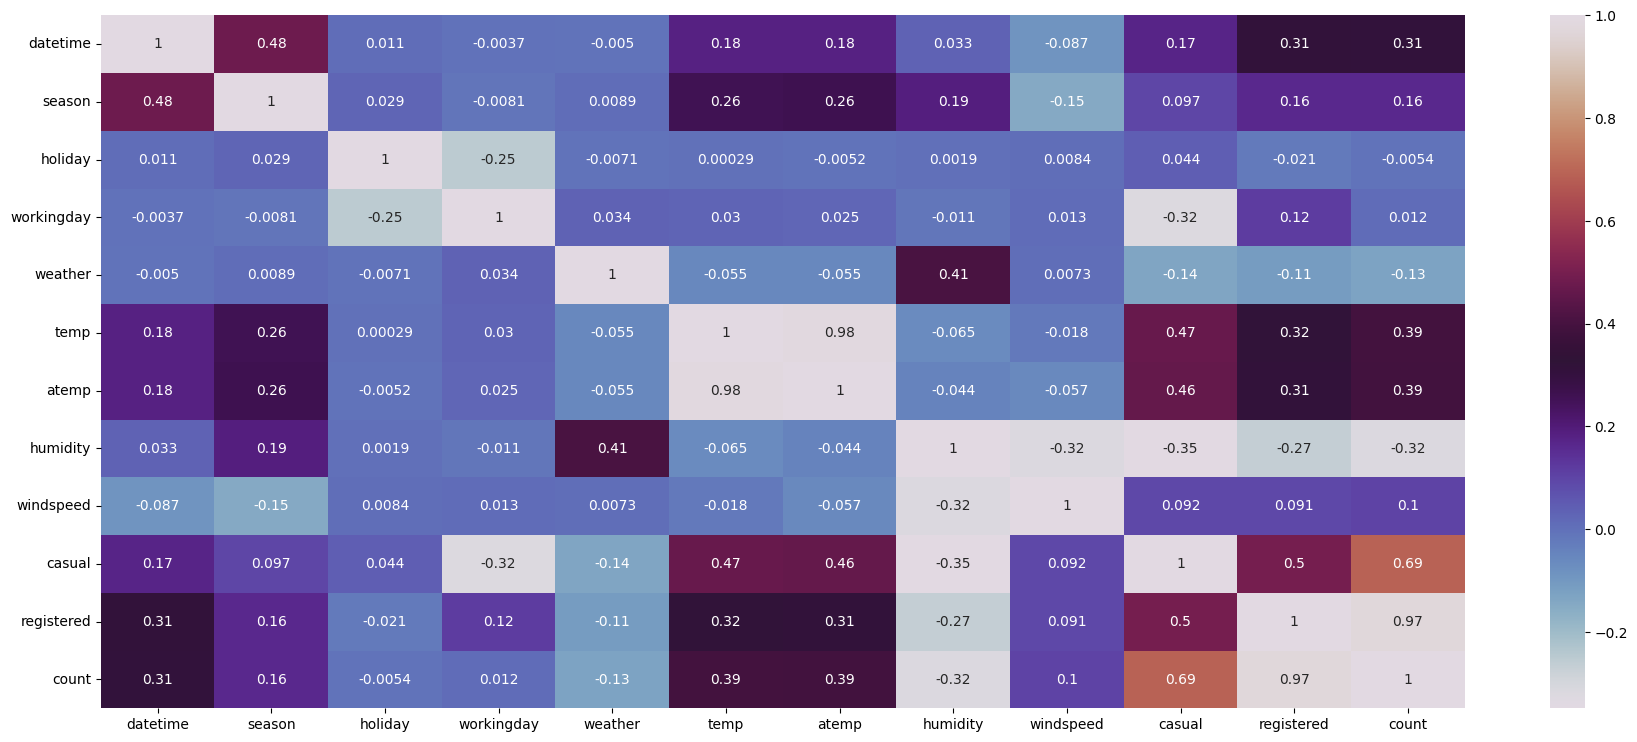

In [342]:
dataset_copy = dataset.copy()
plt.figure(figsize=(22,9))
sns.heatmap(dataset_copy.corr(), annot=True, cmap="twilight", xticklabels=1, yticklabels=1)
plt.show()

# Observations

1. There exists a moderate positive correlation between both season and temperature, and season and body temperature.
2. A moderate positive association is observed between weather conditions and humidity levels.
3. Temporary workers show a moderate positive correlation with both casual demand and the overall count, as well as with pre-booked vehicle usage.
4. Body temperature and casual demand, temperature and pre-booked vehicles, and temperature and total count all display moderate correlations.
5. There is a moderate negative relationship between holidays and working days.
6. A correlation of 50% is noted between pre-booked users and casual users.
7. There exists a strong positive correlation between casual users and total count, and an even stronger correlation between registered users and total count.
8. A strong positive correlation is evident between the month and the season.
9. A moderate positive correlation has been found between the hours registered and total hours counted.
10. A moderate positive correlation is noted between the years registered and total years counted.
11. Humidity and hours show a moderately negative correlation.

# Univariate Analysis

<ipython-input-343-3dddd2171eef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='season', palette="twilight")


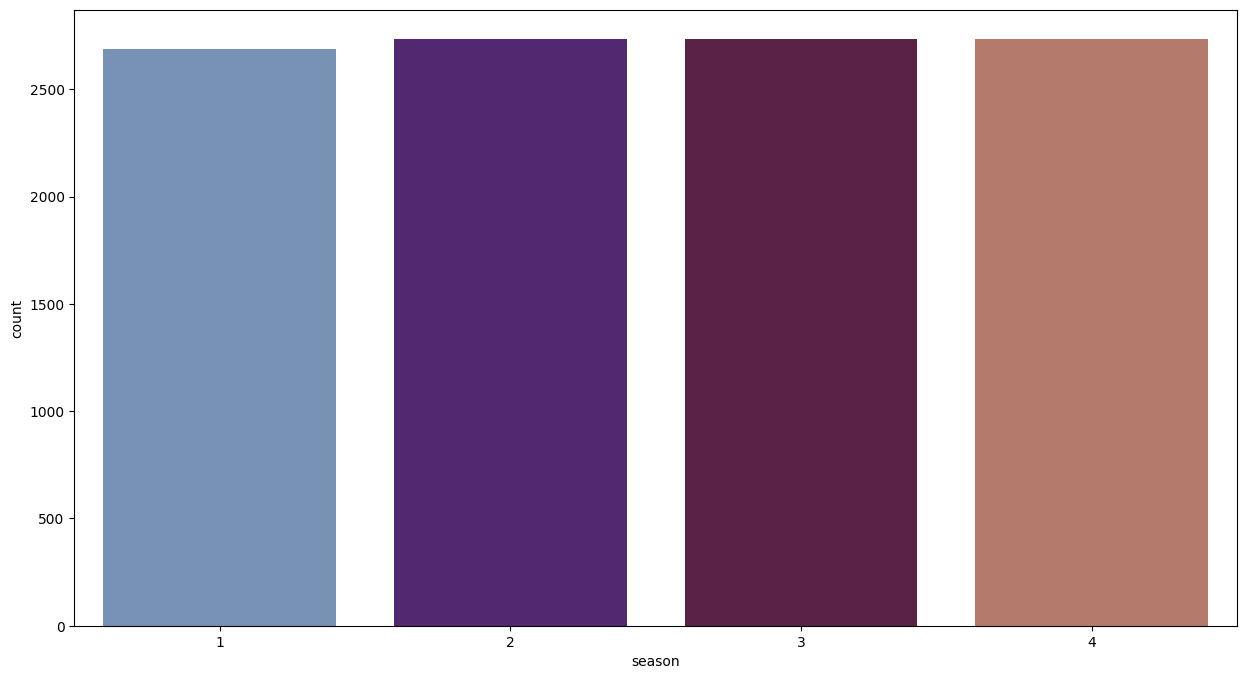

In [343]:
plt.figure(figsize=(15,8))
sns.countplot(data=dataset, x='season', palette="twilight")
plt.show()

# Observations

The seasons are roughly equal in proportion.

<ipython-input-344-c155fdfd06d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='holiday', palette="twilight")


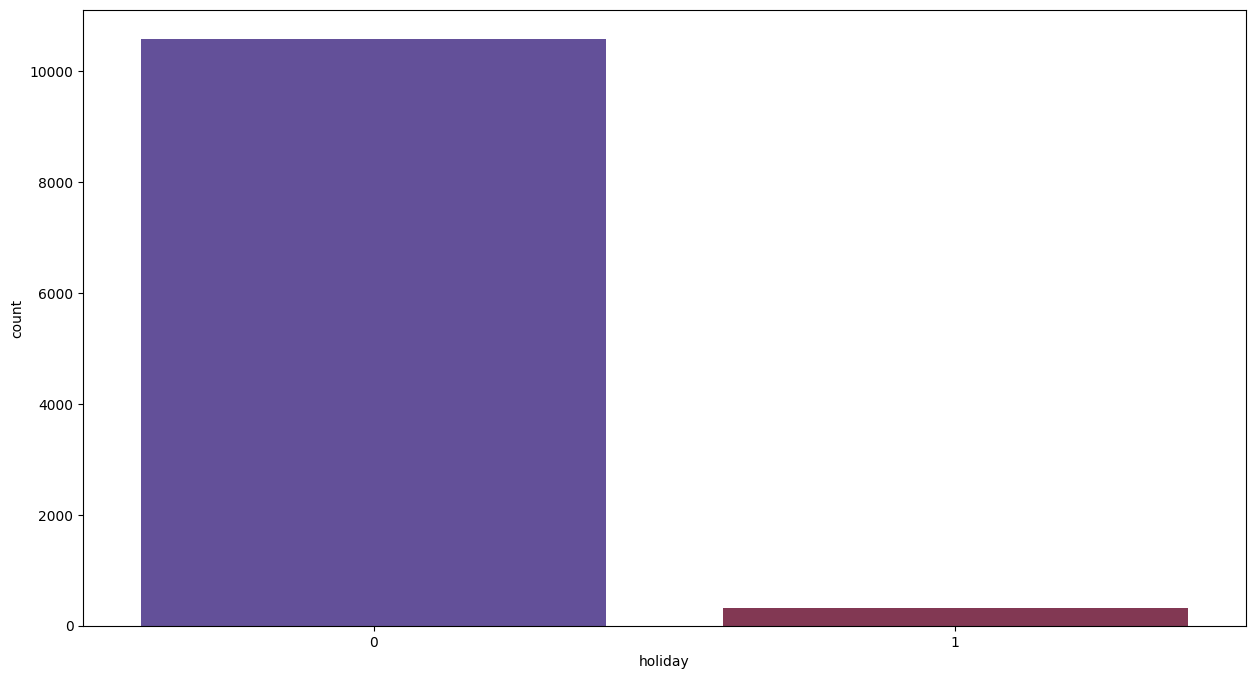

In [344]:
plt.figure(figsize=(15,8))
sns.countplot(data=dataset, x='holiday', palette="twilight")
plt.show()

# Observations

There is a high imbalance in holiday classes. Probably because a lot of people don't use vehicles on holiday.

<ipython-input-345-f5c2a5373339>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='workingday', palette="twilight")


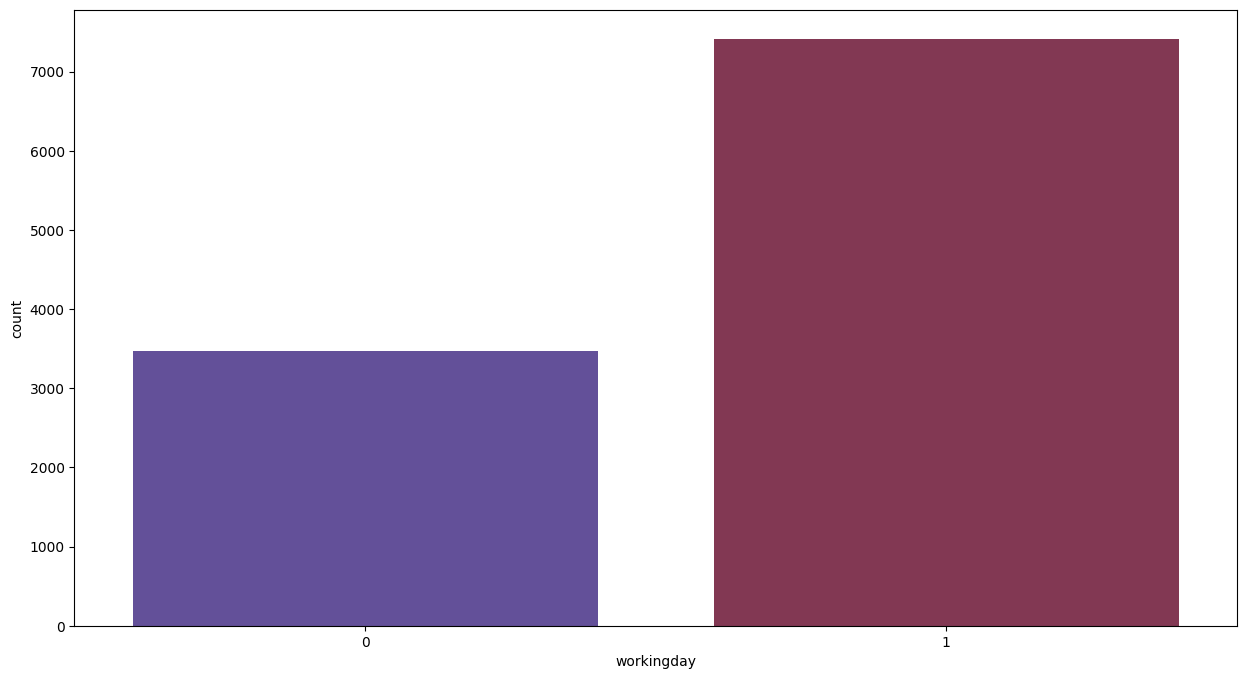

In [345]:
plt.figure(figsize=(15,8))
sns.countplot(data=dataset, x='workingday', palette="twilight")
plt.show()

# Observations

There is a high imbalance in working-day classes. Probably because a lot of people use vehicles on workdays.

<ipython-input-346-fafd2a41416f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='weather', palette="twilight")


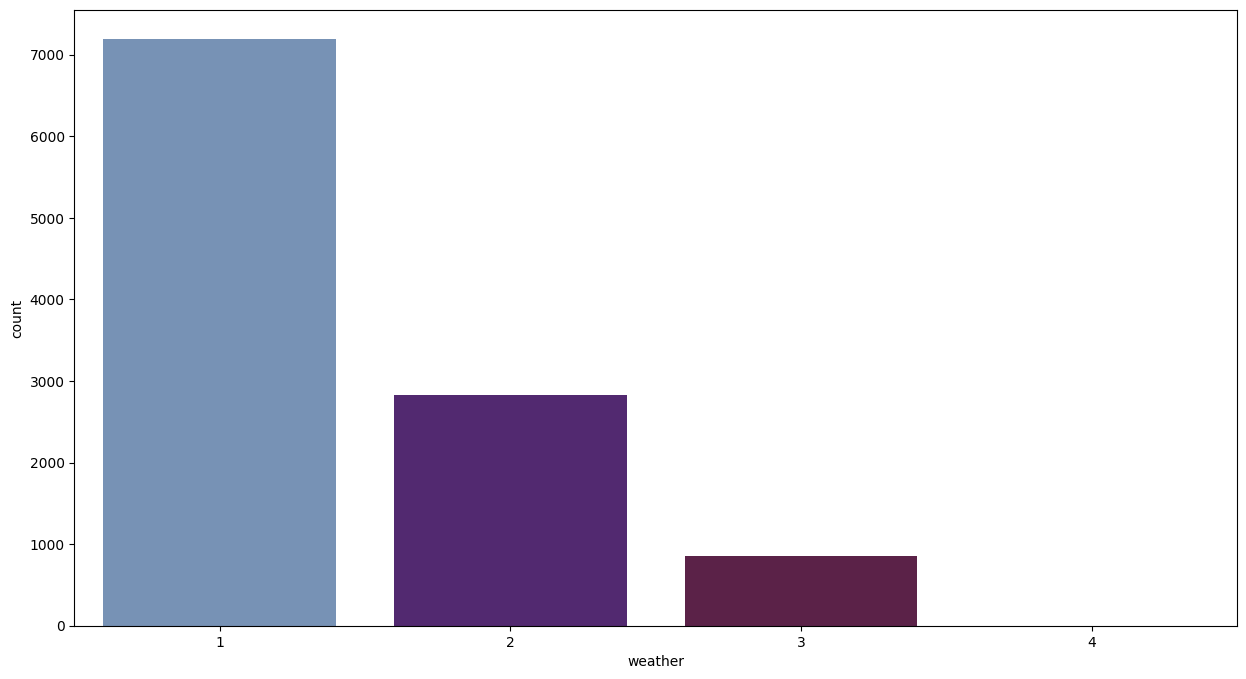

In [346]:
plt.figure(figsize=(15,8))
sns.countplot(data=dataset, x='weather', palette="twilight")
plt.show()

# Observations

1. Under clear or partly cloudy conditions, 66% of the data is gathered, whereas misty or cloudy weather accounts for 26% of the data points.
2. Data collection is minimal during light snow or light rain; understandably, usage drops significantly during heavy rain or thunderstorms.

<ipython-input-347-faa9fd2e03b3>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=dataset, x='temp', palette="twilight", aspect=2, color="m")


<Figure size 1500x800 with 0 Axes>

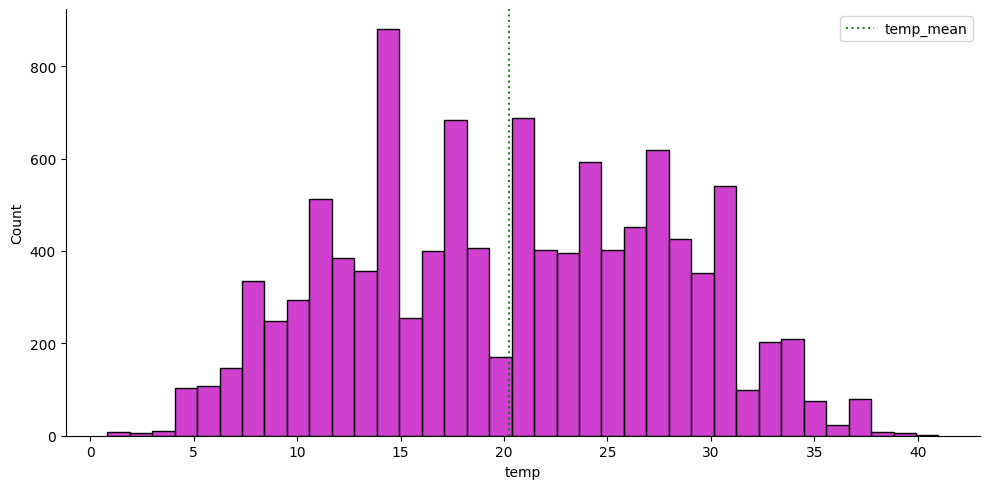

In [347]:
plt.figure(figsize=(15,8))
sns.displot(data=dataset, x='temp', palette="twilight", aspect=2, color="m")
plt.axvline(x=dataset['temp'].mean(), linestyle=":", color='g', label="temp_mean", alpha=0.9)
plt.legend()
plt.show()

# Observations

1. The mean temperature noted was 20.23 degrees Celsius.
2. The highest recorded temperature was 41 degrees Celsius, while the lowest was 0.82 degrees Celsius.

<ipython-input-348-b3f4c6c2cad1>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=dataset, x='atemp', palette="twilight", aspect=2, color="brown")


<Figure size 1500x800 with 0 Axes>

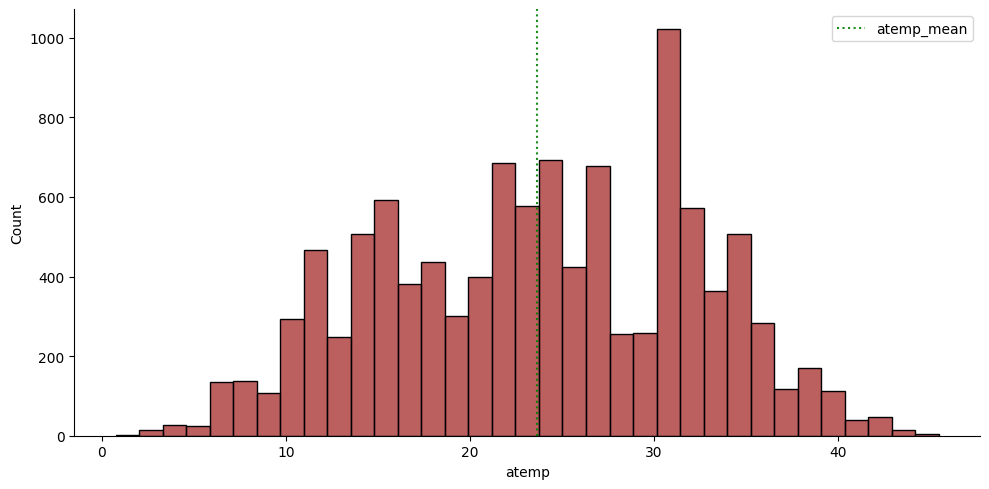

In [348]:
plt.figure(figsize=(15,8))
sns.displot(data=dataset, x='atemp', palette="twilight", aspect=2, color="brown")
plt.axvline(x=dataset['atemp'].mean(), linestyle=":", color='g', label="atemp_mean", alpha=0.9)
plt.legend()
plt.show()

# Observations

1. On average, people felt a temperature of 23.65 degrees Celsius.
2. The highest recorded feeling of temperature was 45.45 degrees Celsius, while the lowest was 0.76 degrees Celsius.

<ipython-input-349-592340aa3304>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=dataset, x='windspeed', palette="twilight", aspect=2, color="b")


<Figure size 1500x800 with 0 Axes>

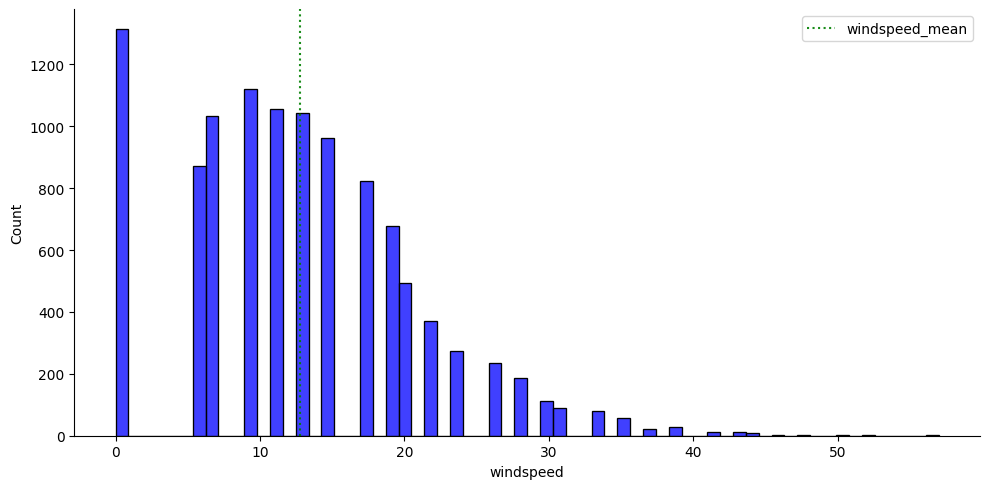

In [349]:
plt.figure(figsize=(15,8))
sns.displot(data=dataset, x='windspeed', palette="twilight", aspect=2, color="b")
plt.axvline(x=dataset['windspeed'].mean(), linestyle=":", color='g', label="windspeed_mean", alpha=0.9)
plt.legend()
plt.show()

# Observations

Clearly, the windspeed graph is right skewed.The average wind speed was 12.8. The maximum wind speed was 56.996, and the minimum wind speed was recorded at 0.

Windspeed of zero has the highest number of data points.

<ipython-input-350-f0ffe426f949>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=dataset, x='humidity', palette="twilight", aspect=2, color="r")


<Figure size 1500x800 with 0 Axes>

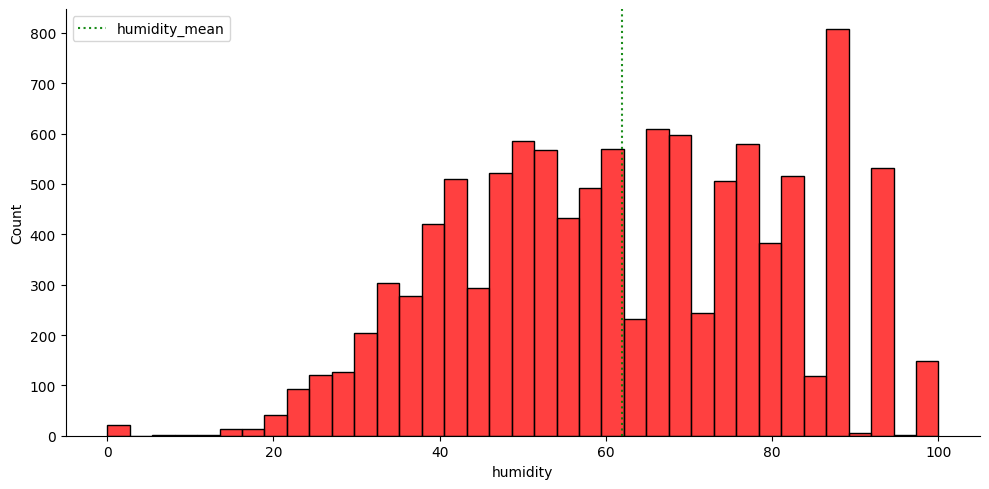

In [350]:
plt.figure(figsize=(15,8))
sns.displot(data=dataset, x='humidity', palette="twilight", aspect=2, color="r")
plt.axvline(x=dataset['humidity'].mean(), linestyle=":", color='g', label="humidity_mean", alpha=0.9)
plt.legend()
plt.show()

# Observations

Graph looks slightly left skewed, with maximum humidity at 100. The average humidity observed is 61.886.

<ipython-input-351-632f73552e10>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=dataset, x='casual', palette="twilight", aspect=2, color="b")


<Figure size 1500x800 with 0 Axes>

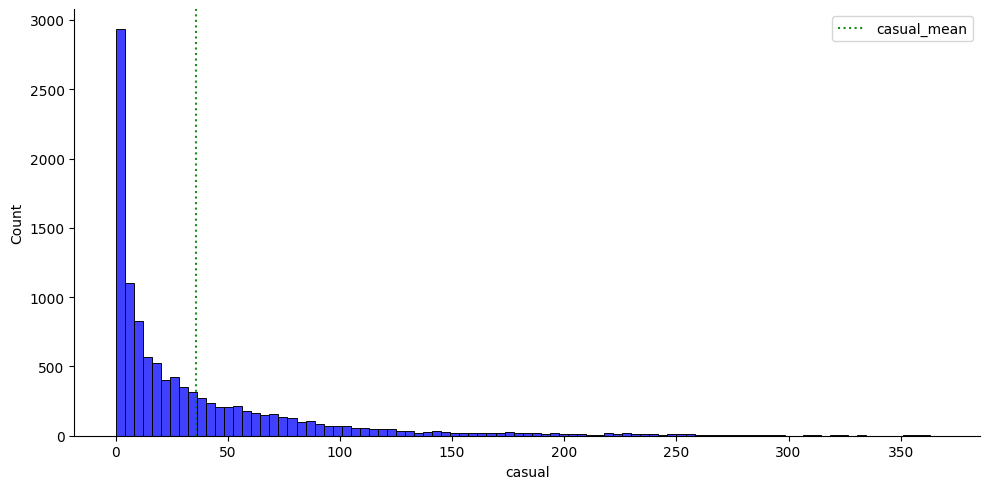

In [351]:
plt.figure(figsize=(15,8))
sns.displot(data=dataset, x='casual', palette="twilight", aspect=2, color="b")
plt.axvline(x=dataset['casual'].mean(), linestyle=":", color='g', label="casual_mean", alpha=0.9)
plt.legend()
plt.show()

# Observations

1. The distribution of casual users is heavily skewed to the right, with most values clustering at zero.
2. The mean count of casual users stands at 36.02.
3. Casual user counts range from a minimum of zero to a maximum of 367.

<ipython-input-352-3db55a424359>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=dataset, x='registered', palette="twilight", aspect=2, color="m")


<Figure size 1500x800 with 0 Axes>

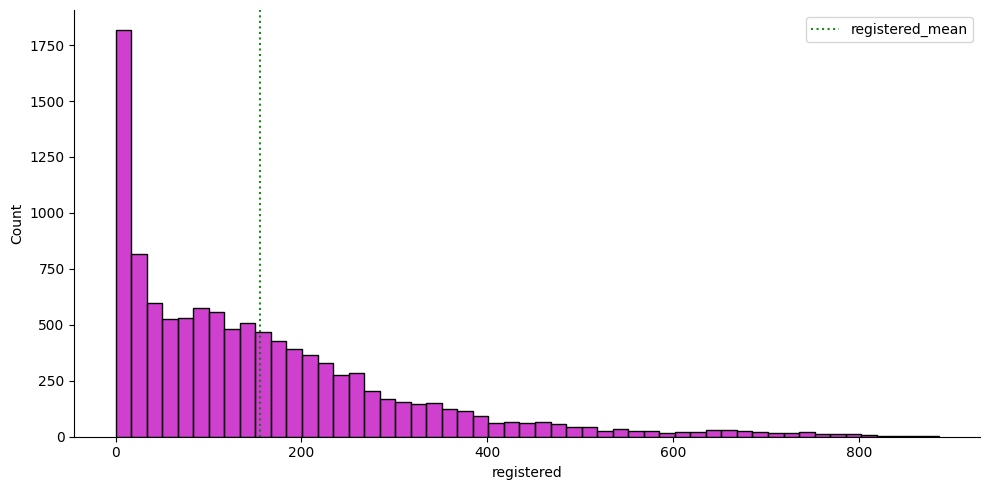

In [352]:
plt.figure(figsize=(15,8))
sns.displot(data=dataset, x='registered', palette="twilight", aspect=2, color="m")
plt.axvline(x=dataset['registered'].mean(), linestyle=":", color='g', label="registered_mean", alpha=0.9)
plt.legend()
plt.show()

# Observations

Registered graph is clearly right skewed, having average of 155.52 users. The maximum and minimum number of registered users are 886 and 0, respectively.

<ipython-input-353-590e3e8198d5>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=dataset, x='count', palette="twilight", aspect=2, color="black")


<Figure size 1500x800 with 0 Axes>

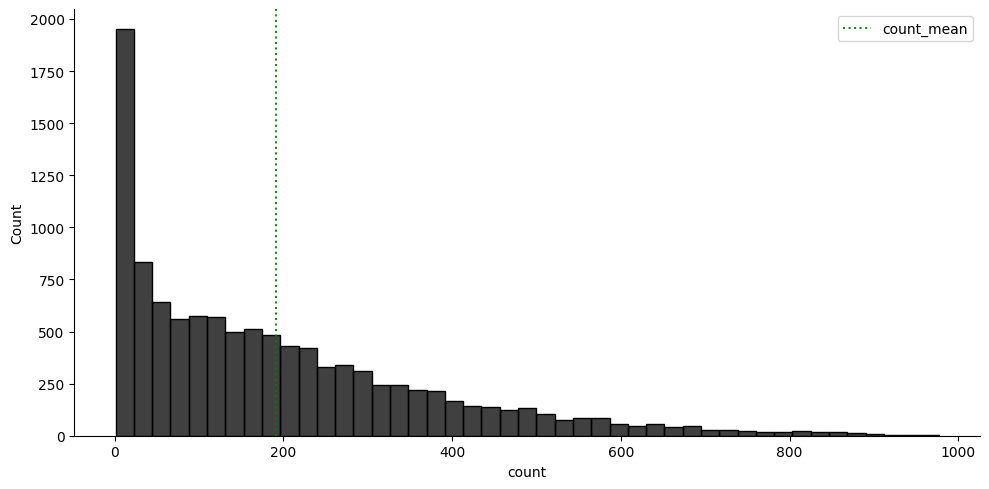

In [353]:
plt.figure(figsize=(15,8))
sns.displot(data=dataset, x='count', palette="twilight", aspect=2, color="black")
plt.axvline(x=dataset['count'].mean(), linestyle=":", color='g', label="count_mean", alpha=0.9)
plt.legend()
plt.show()

# Observations

As count is sum of registered and casual users, the graph will be rightly skewed. The peak of the graph is at zero, while the average is at 91.57.

<ipython-input-354-34998894e4a9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(data=dataset, x="casual", palette="copper", legend=True, label="casual")
<ipython-input-354-34998894e4a9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(data=dataset, x="registered", palette="copper", legend=True, label="registered")
<ipython-input-354-34998894e4a9>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(data=dataset, x="count", palette="copper", legend=True, label="count")


Text(0.5, 1.0, 'CDF of Casual, Registered and Count')

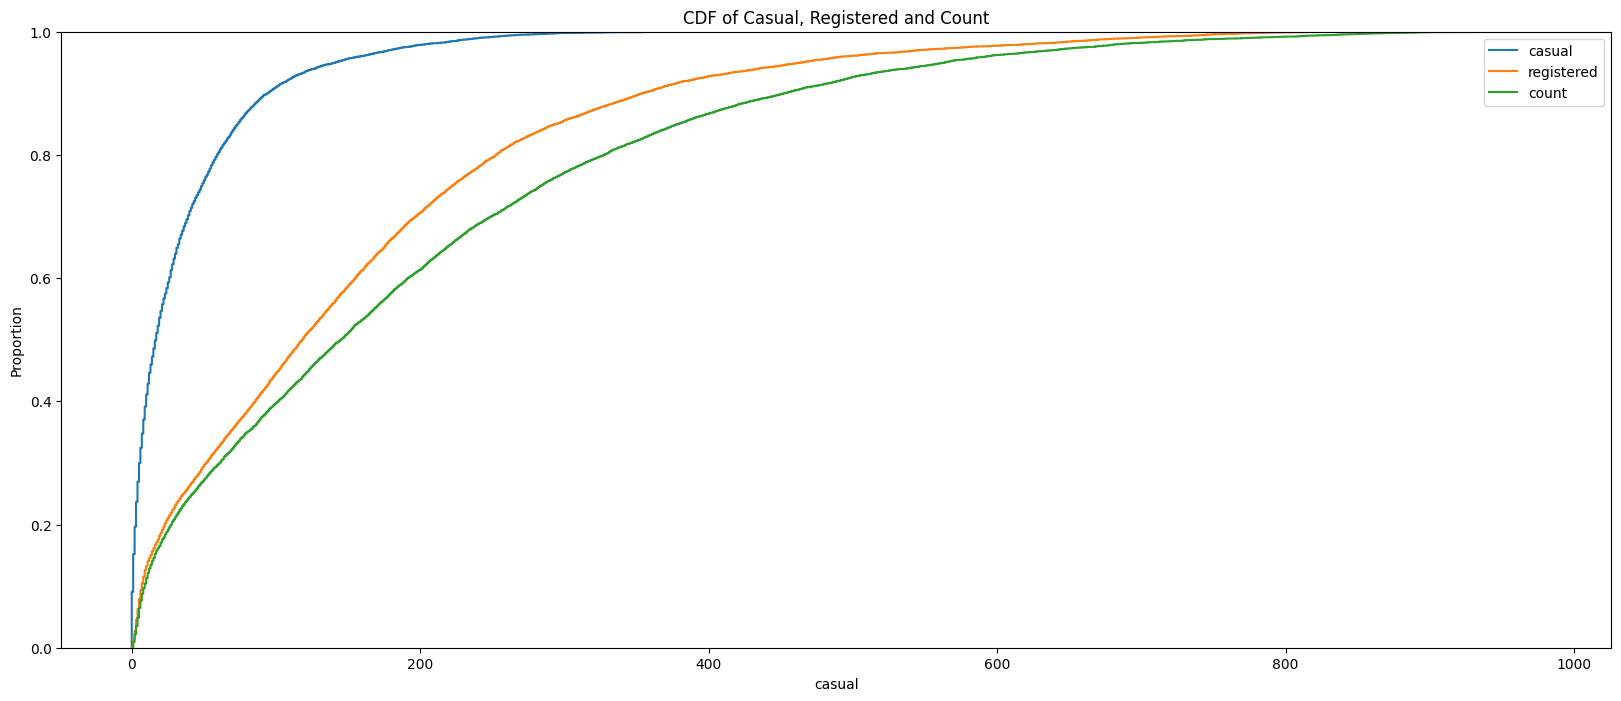

In [354]:
plt.figure(figsize=(20,8))
sns.ecdfplot(data=dataset, x="casual", palette="copper", legend=True, label="casual")
sns.ecdfplot(data=dataset, x="registered", palette="copper", legend=True, label="registered")
sns.ecdfplot(data=dataset, x="count", palette="copper", legend=True, label="count")
plt.legend()
plt.title("CDF of Casual, Registered and Count")

# Bivariate Analysis

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

<ipython-input-378-01b94e08f6a1>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="hour", y="count", data=dataset_copy, palette="terrain")


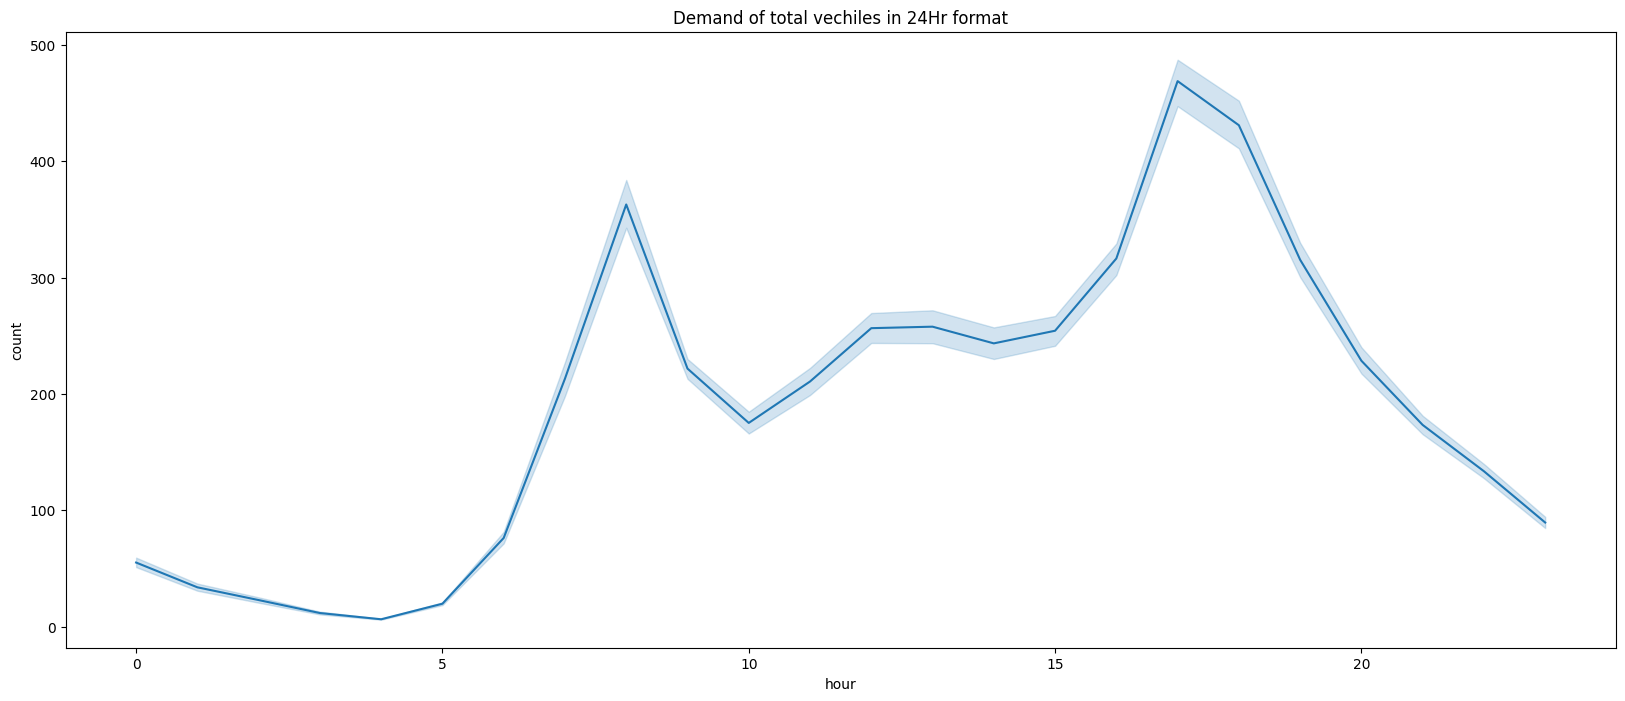

In [378]:
print(dataset_copy)
plt.figure(figsize=(20,8))
sns.lineplot(x="hour", y="count", data=dataset_copy, palette="terrain")
plt.title("Demand of total vechiles in 24Hr format")
plt.show()

# Observations

The highest peak demand can be seen during the 17-19 hour period, followed by the peak from 7-9 hours.

<ipython-input-379-705d5fd45d40>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="month", y="count", data=dataset_copy, palette="terrain")


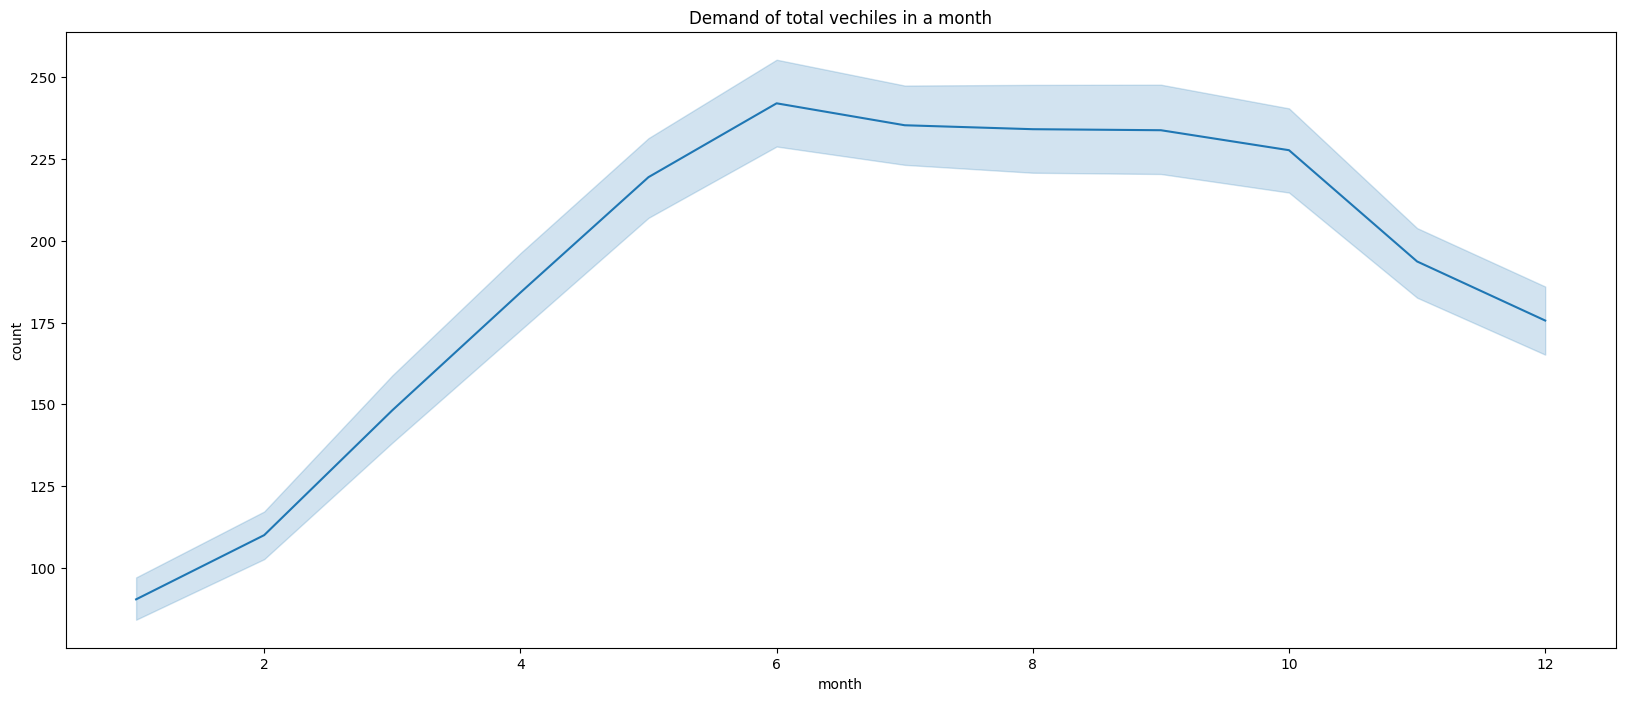

In [379]:
plt.figure(figsize=(20,8))
sns.lineplot(x="month", y="count", data=dataset_copy, palette="terrain")
plt.title("Demand of total vechiles in a month")
plt.show()

# Observations

Steady vehicle demand is from July to October; after that, from November to February, it is downgrading. The demand curve is linear from February to July.

<ipython-input-380-46d2e063e121>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="month", y="registered", data=dataset_copy, palette="terrain")


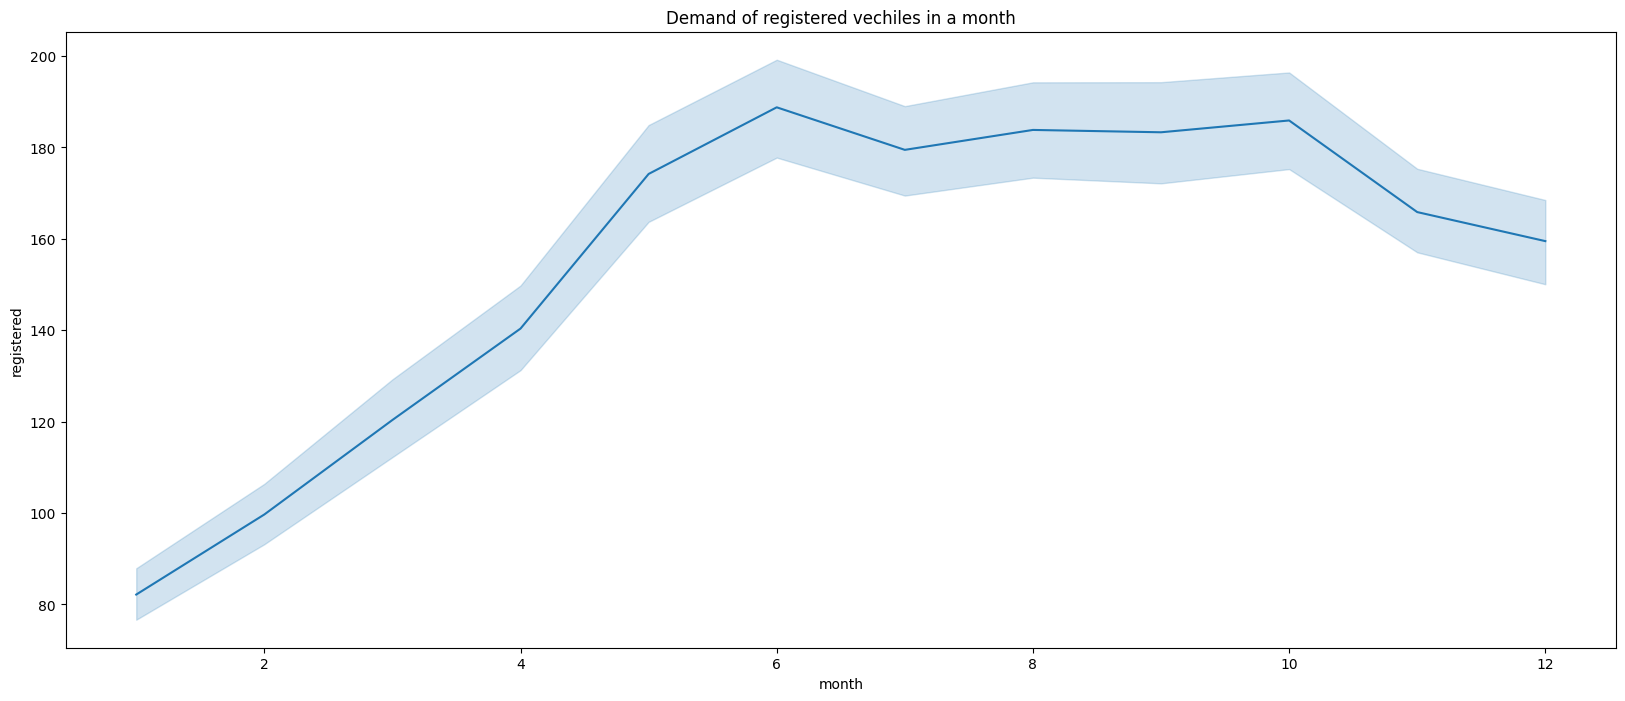

In [380]:
plt.figure(figsize=(20,8))
sns.lineplot(x="month", y="registered", data=dataset_copy, palette="terrain")
plt.title("Demand of registered vechiles in a month")
plt.show()

# Observations

Same observations as in count demand

<ipython-input-381-c40cd9ec3711>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="month", y="casual", data=dataset_copy, palette="terrain")


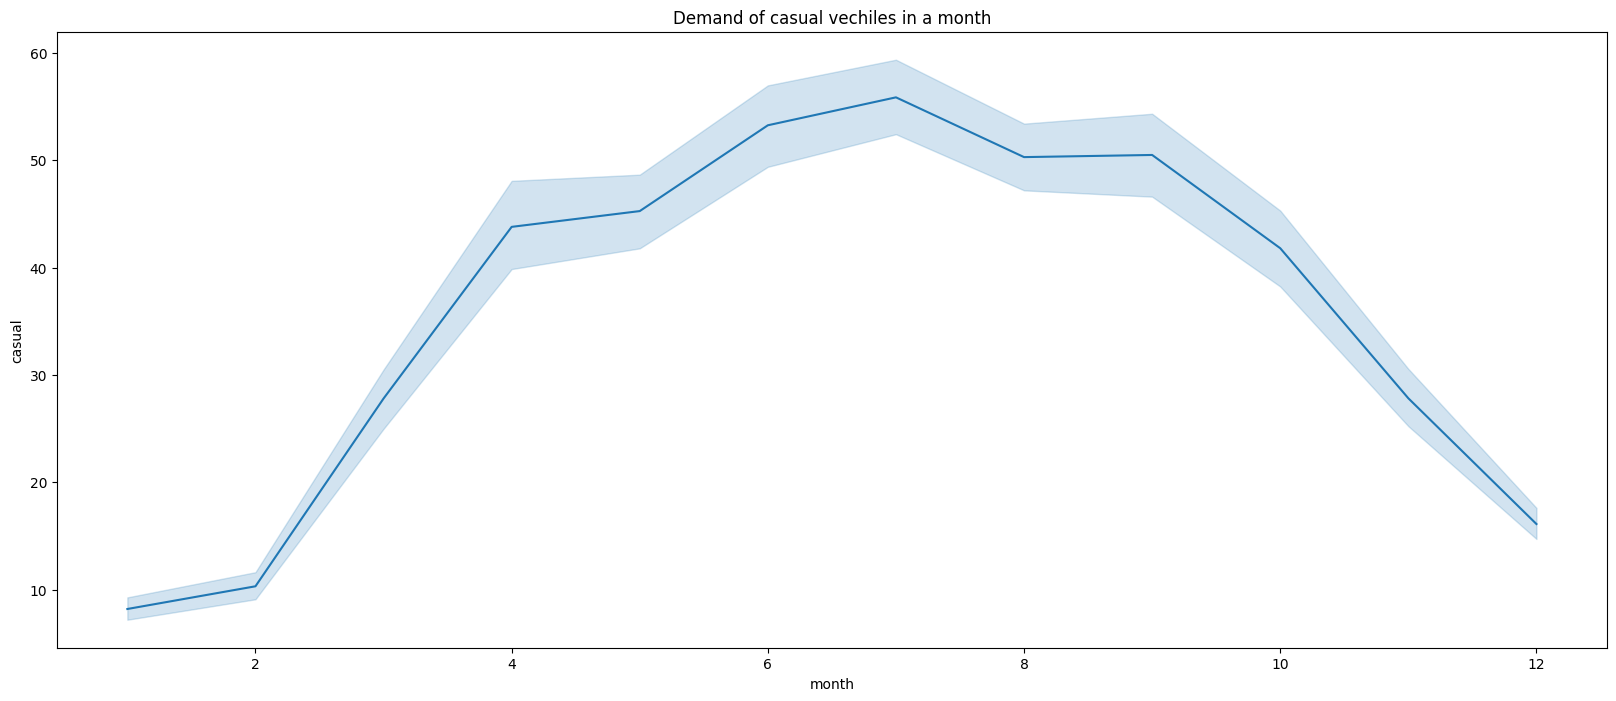

In [381]:
plt.figure(figsize=(20,8))
sns.lineplot(x="month", y="casual", data=dataset_copy, palette="terrain")
plt.title("Demand of casual vechiles in a month")
plt.show()

# Observations

Same observations as in count demand.

<ipython-input-382-4216ea02e6ba>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="hour", y="registered", data=dataset_copy, palette="terrain")


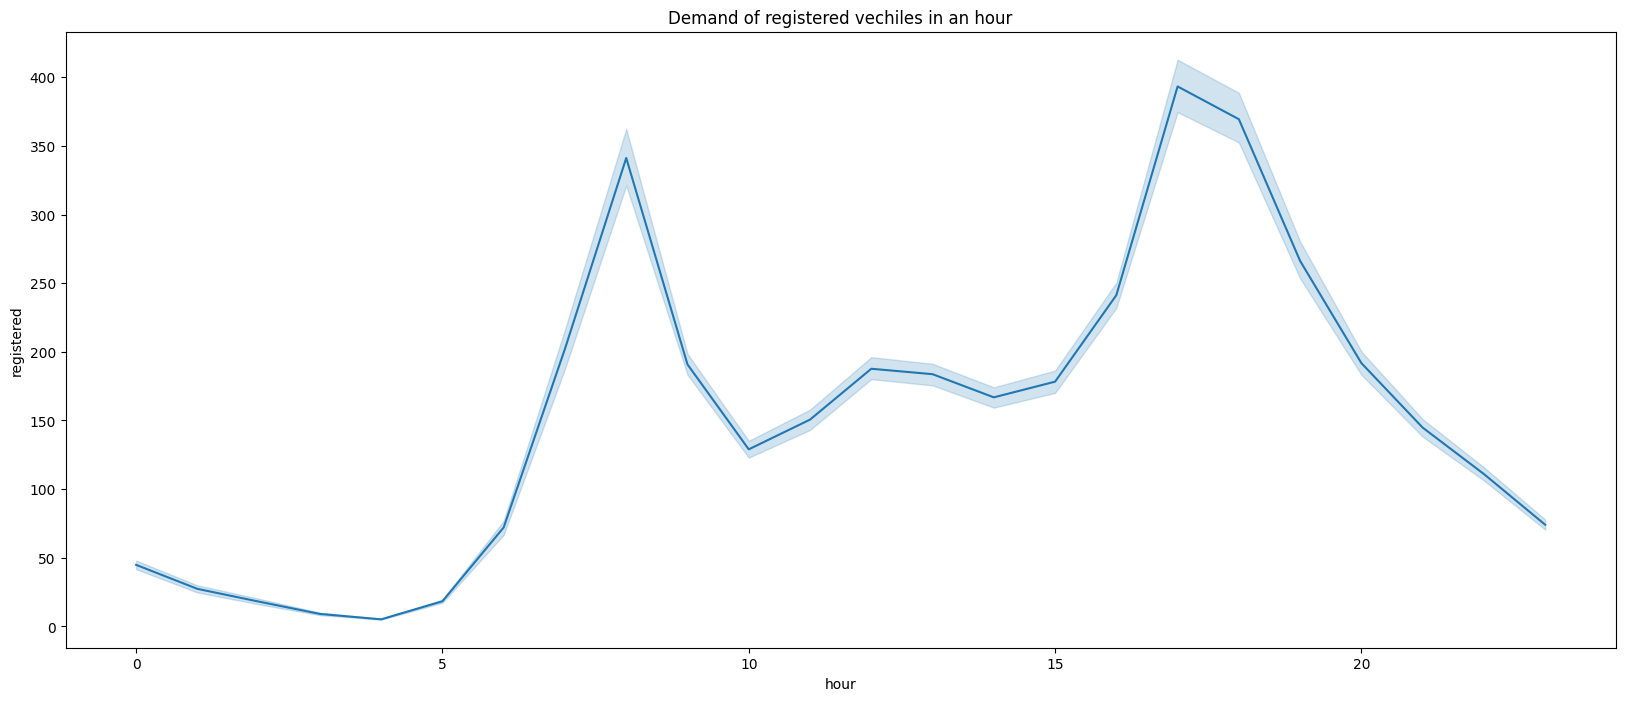

In [382]:
plt.figure(figsize=(20,8))
sns.lineplot(x="hour", y="registered", data=dataset_copy, palette="terrain")
plt.title("Demand of registered vechiles in an hour")
plt.show()

# Observations

Same observations as in registered demand curve in 24Hr format.

<ipython-input-383-b7978bdef538>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="hour", y="casual", data=dataset_copy, palette="gist_earth")


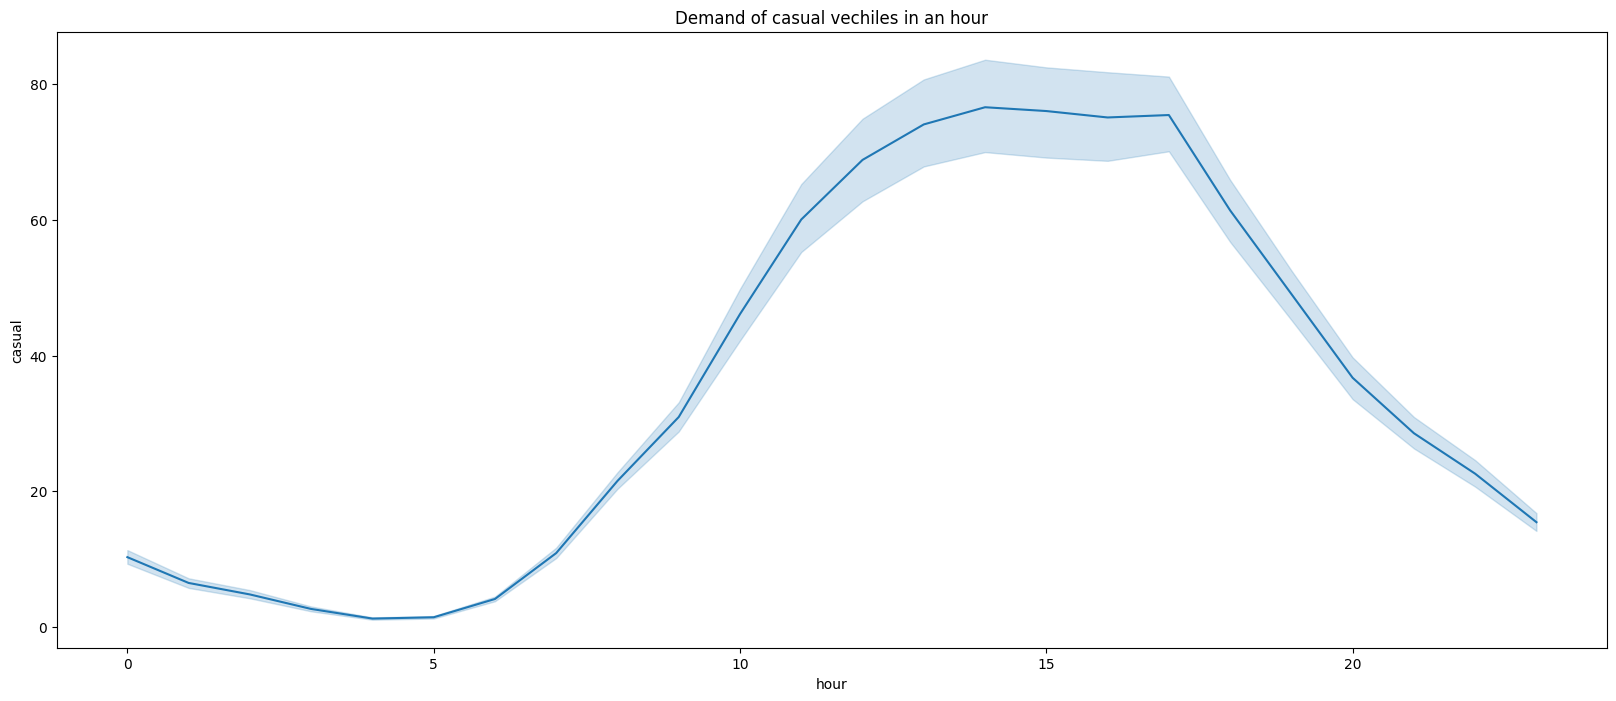

In [383]:
plt.figure(figsize=(20,8))
sns.lineplot(x="hour", y="casual", data=dataset_copy, palette="gist_earth")
plt.title("Demand of casual vechiles in an hour")
plt.show()

# Observations

The casual demand curve in an hour is steady and peaks from 14-16 hours, while it steadily falls from 16-24 hours. There is linear demand from 5.5 to 14 hours.

<ipython-input-384-63253c32c388>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="count", palette="terrain", ax=axes[index])
<ipython-input-384-63253c32c388>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="count", palette="terrain", ax=axes[index])
<ipython-input-384-63253c32c388>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="count", palette="terrain", ax=axes[index])
<ipython-input-384-63253c32c388>:8: FutureWarning: 

Passing `palette` without assigning `h

<Figure size 2000x800 with 0 Axes>

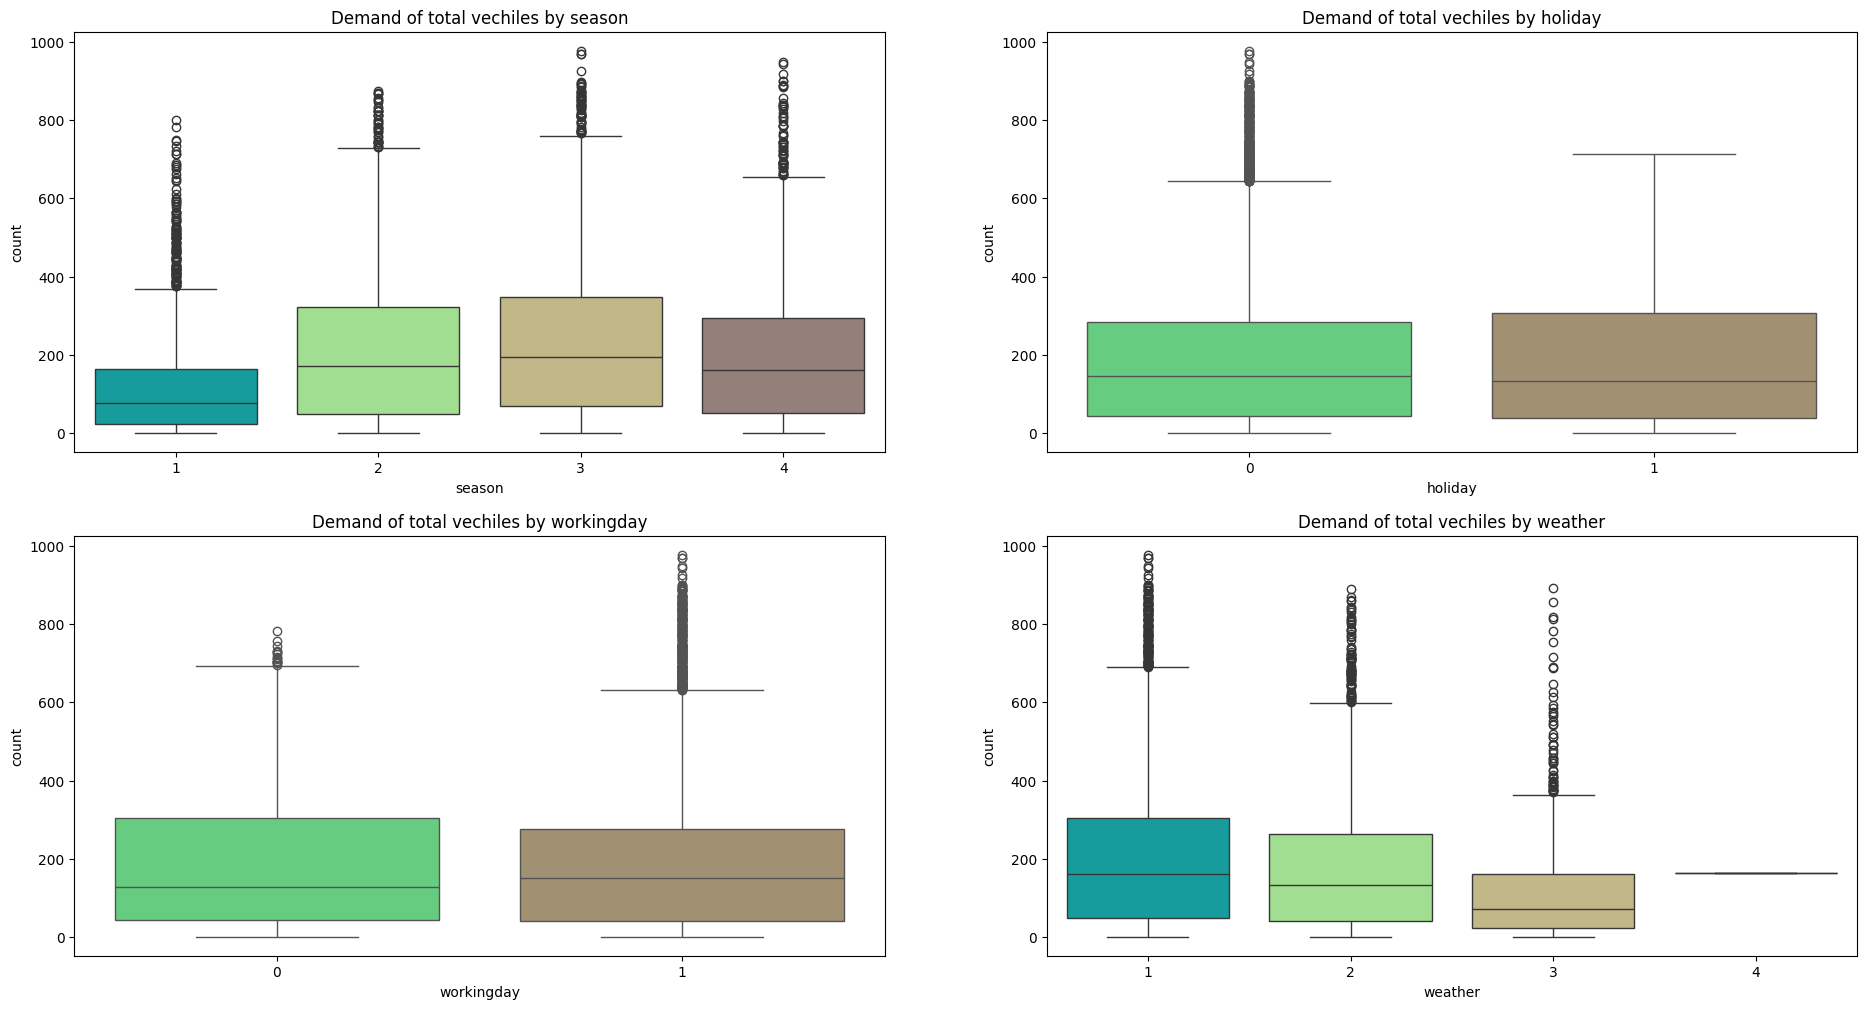

In [384]:
plt.figure(figsize=(20,8))
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

for index, column in enumerate(categorical_columns):
  sns.boxplot(data=dataset, x=column, y="count", palette="terrain", ax=axes[index])
  axes[index].set_title(f"Demand of total vechiles by {column}", )

# Observations

## Season

1. The median demand in the summer, fall, and winter seasons is nearly identical, while the median is very low in the spring season.

2. The outliers in countable demand can be seen for all the seasons, probably lot of outliers in spring season. All the outliers are in the upper range of Inter Quartile Range (IQR).

## Holiday

1. The median counted demand is nearly identical during holidays and non-holidays.

2. There are no outliers in the counted demand for holidays, whereas there are outliers in the non-holiday demand, and that too, in the upper Inter Quartile Range (IQR).

## workingday

1. The median difference between a working day and a non-working day is only marginally significant.

2. There are outliers in vehicle demand on working and non-working days.


## Weather

1. For clear/few clouds and misty/cloudy conditions, the median demand for counted vehicles is nearly identical.

2. The demand for counted vehicles during light snow/light rain is less than during clear and mist conditions.

3. There is only one data point for heavy rain and thunder storms, which makes sense as nobody would prefer to ride in these heavy conditions.

4. There are outliers in the upper IQR for all the conditions, except heavy rain.

<ipython-input-385-e5505402b1da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="registered", palette="ocean", ax=axes[index])
<ipython-input-385-e5505402b1da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="registered", palette="ocean", ax=axes[index])
<ipython-input-385-e5505402b1da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="registered", palette="ocean", ax=axes[index])
<ipython-input-385-e5505402b1da>:7: FutureWarning: 

Passing `palette` without ass

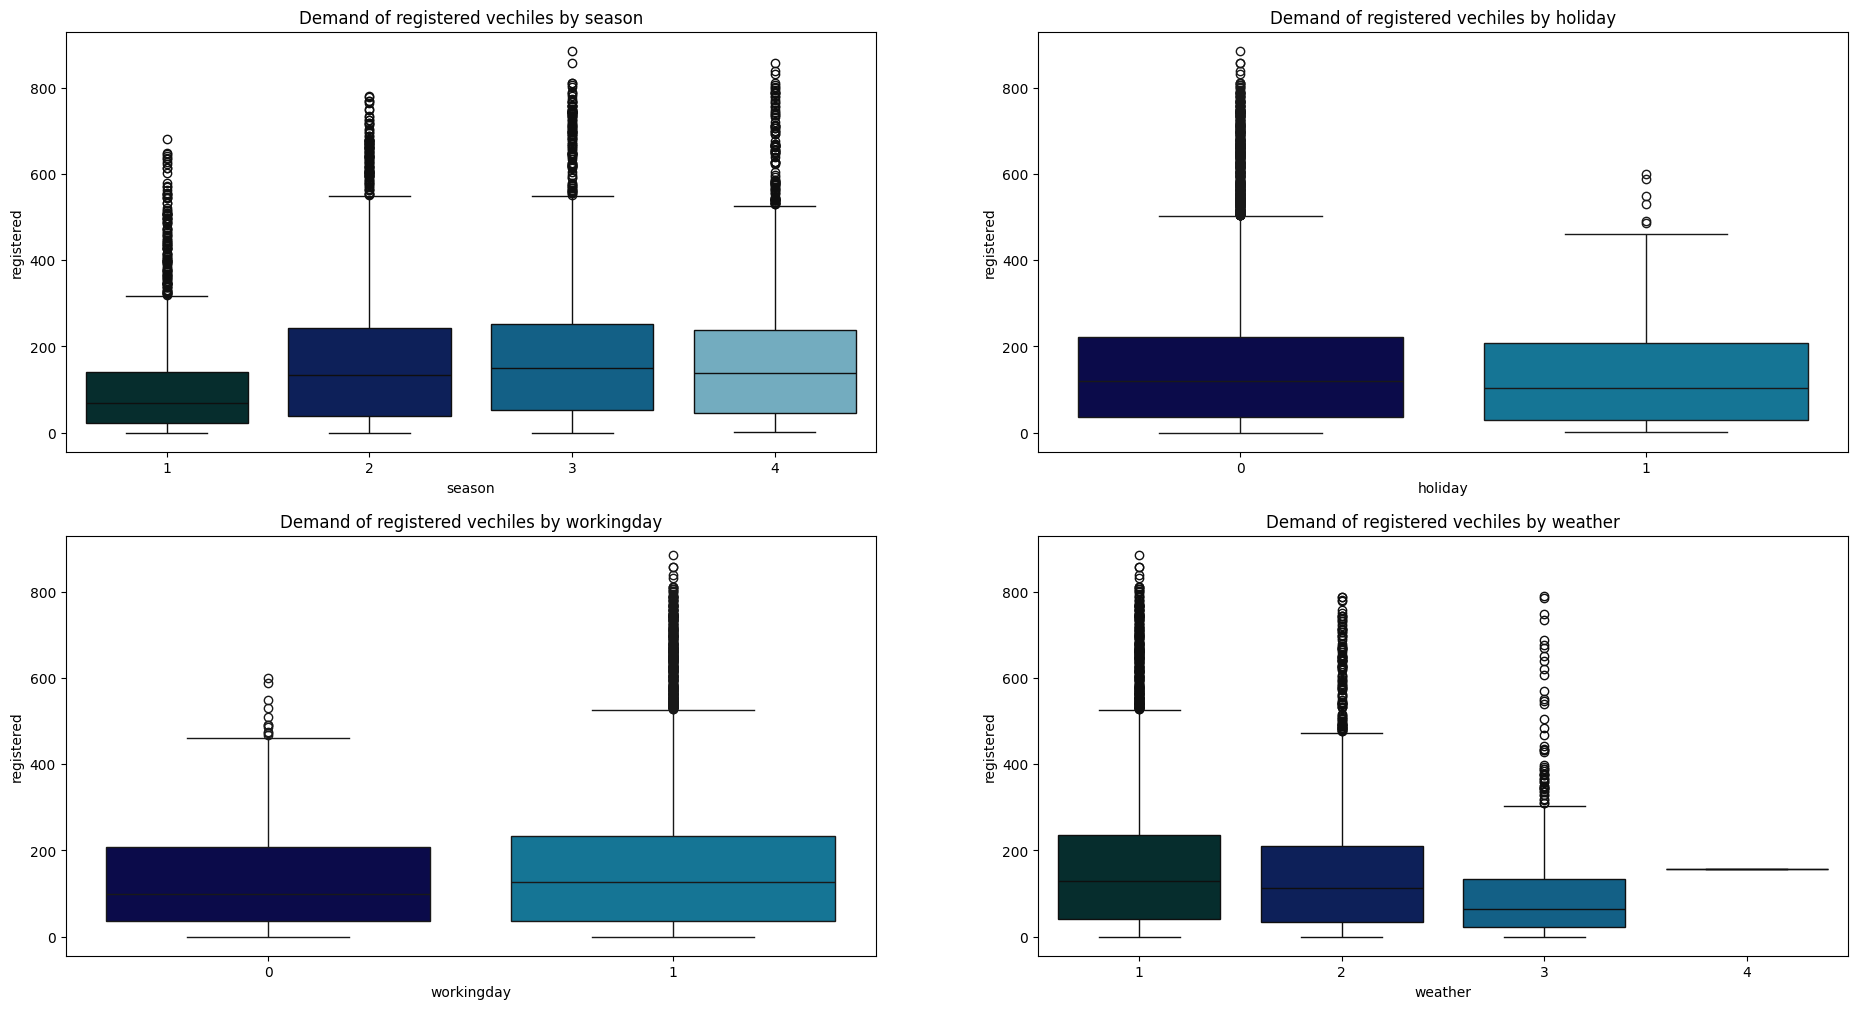

In [385]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

for index, column in enumerate(categorical_columns):
  sns.boxplot(data=dataset, x=column, y="registered", palette="ocean", ax=axes[index])
  axes[index].set_title(f"Demand of registered vechiles by {column}", )

# Observations

The observations for registered vehicles and counted vehicles are the same for all the categories, except there are outliers in the upper IQR for holidays.

<ipython-input-386-5cb1893f873a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="casual", palette="Pastel1", ax=axes[index])
<ipython-input-386-5cb1893f873a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="casual", palette="Pastel1", ax=axes[index])
<ipython-input-386-5cb1893f873a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=column, y="casual", palette="Pastel1", ax=axes[index])
<ipython-input-386-5cb1893f873a>:7: FutureWarning: 

Passing `palette` without assigning

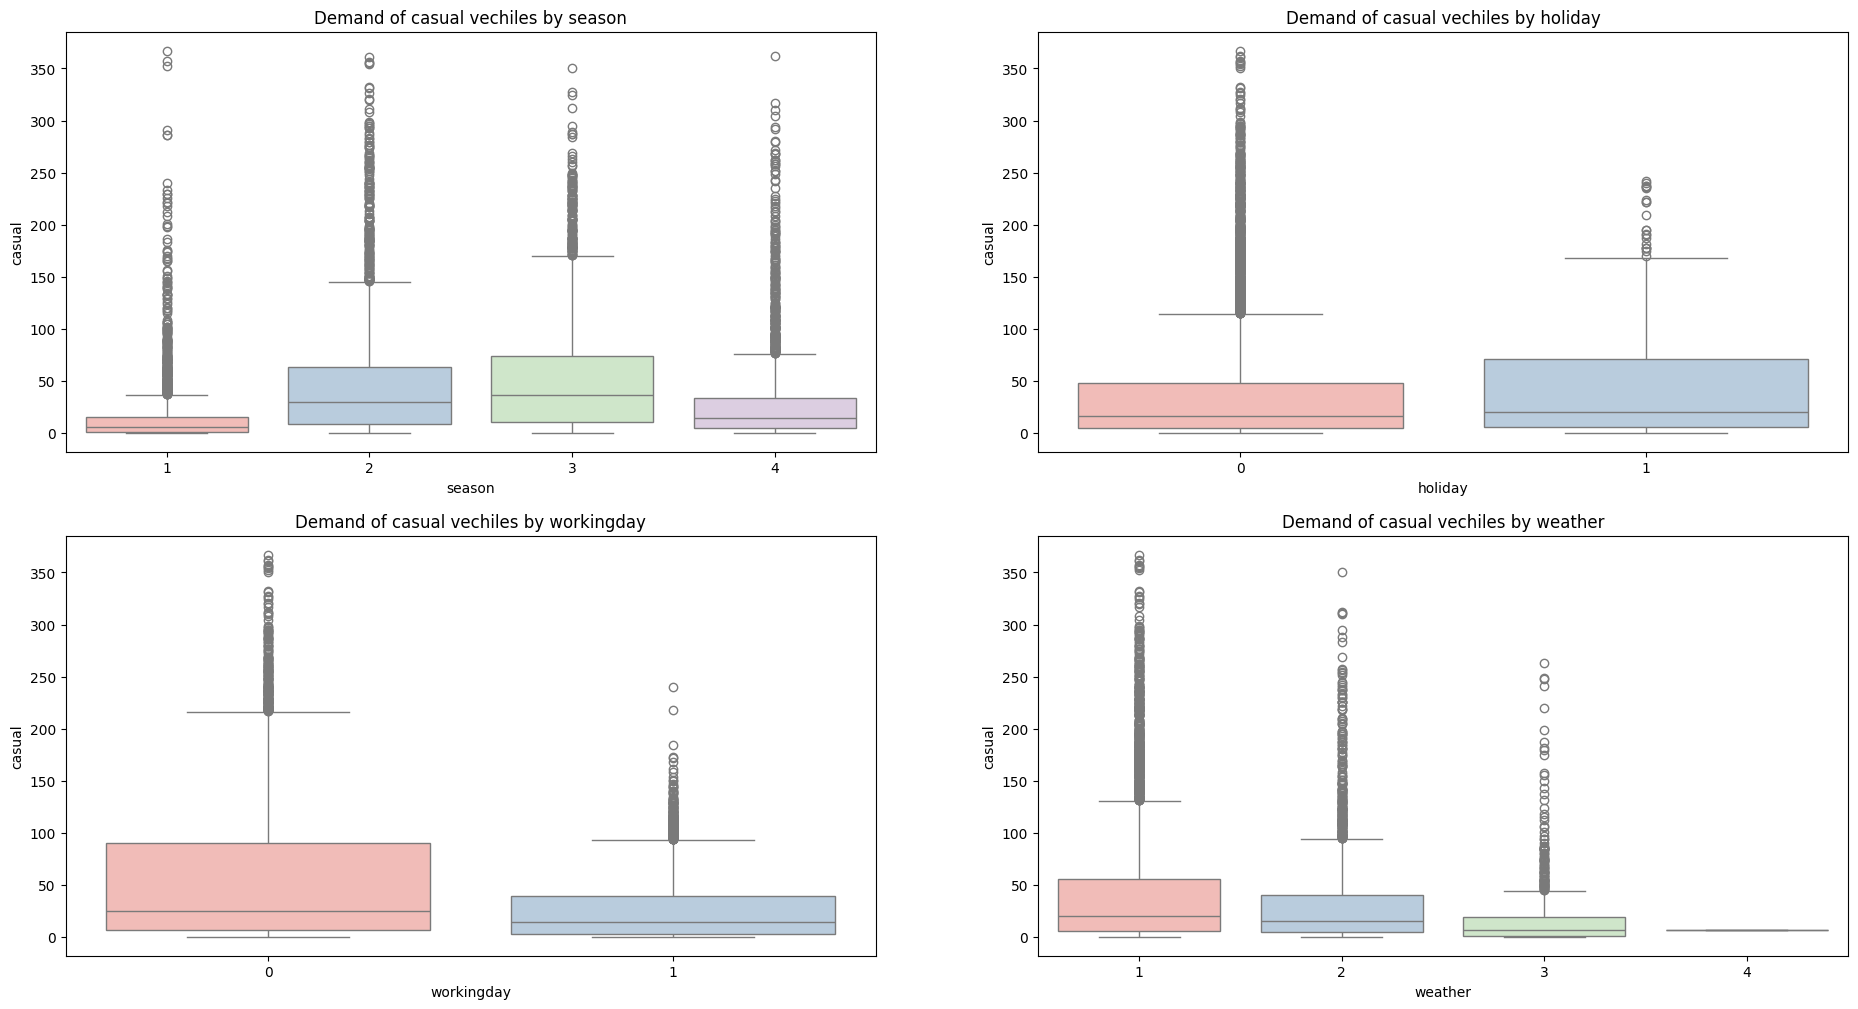

In [386]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

for index, column in enumerate(categorical_columns):
  sns.boxplot(data=dataset, x=column, y="casual", palette="Pastel1", ax=axes[index])
  axes[index].set_title(f"Demand of casual vechiles by {column}", )

# Observations

## Season

1. The median casual demand in the summer, and fall seasons is nearly identical, while the median deman d is very low in the spring season and slightly more in winter season.

2. The outliers in causal demand can be seen for all the seasons, probably lot of outliers in spring and winter season. All the outliers are in the upper range of Inter Quartile Range (IQR).

## Holiday

1. The median casual demand for vechiles is nearly identical during holidays and non-holidays.

2. There are outliers in the casual demand for holidays and non-holidays, and that too, in the upper Inter Quartile Range (IQR).

## workinday

1. The median difference between a working day and a non-working day is only marginally significant.

2. The distribution of the workinday is smaller than non-working day.

3. There are outliers in vehicle demand on working and non-working days.

## Weather

1. For clear/few clouds and misty/cloudy conditions, the median demand for counted vehicles is nearly identical.

2. The demand for counted vehicles during light snow/light rain is less than during clear and mist conditions.

3. There is only one data point for heavy rain and thunder storms, which makes sense as nobody would prefer to ride in these heavy conditions.

4. There are outliers in the upper IQR for all the conditions, except heavy rain.



<ipython-input-387-06fa7df6d374>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_copy, x='temp_bin', y=column, palette="ocean", ax=axes[index])
<ipython-input-387-06fa7df6d374>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_copy, x='temp_bin', y=column, palette="ocean", ax=axes[index])
<ipython-input-387-06fa7df6d374>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_copy, x='temp_bin', y=column, palette="ocean", ax=axes[index])


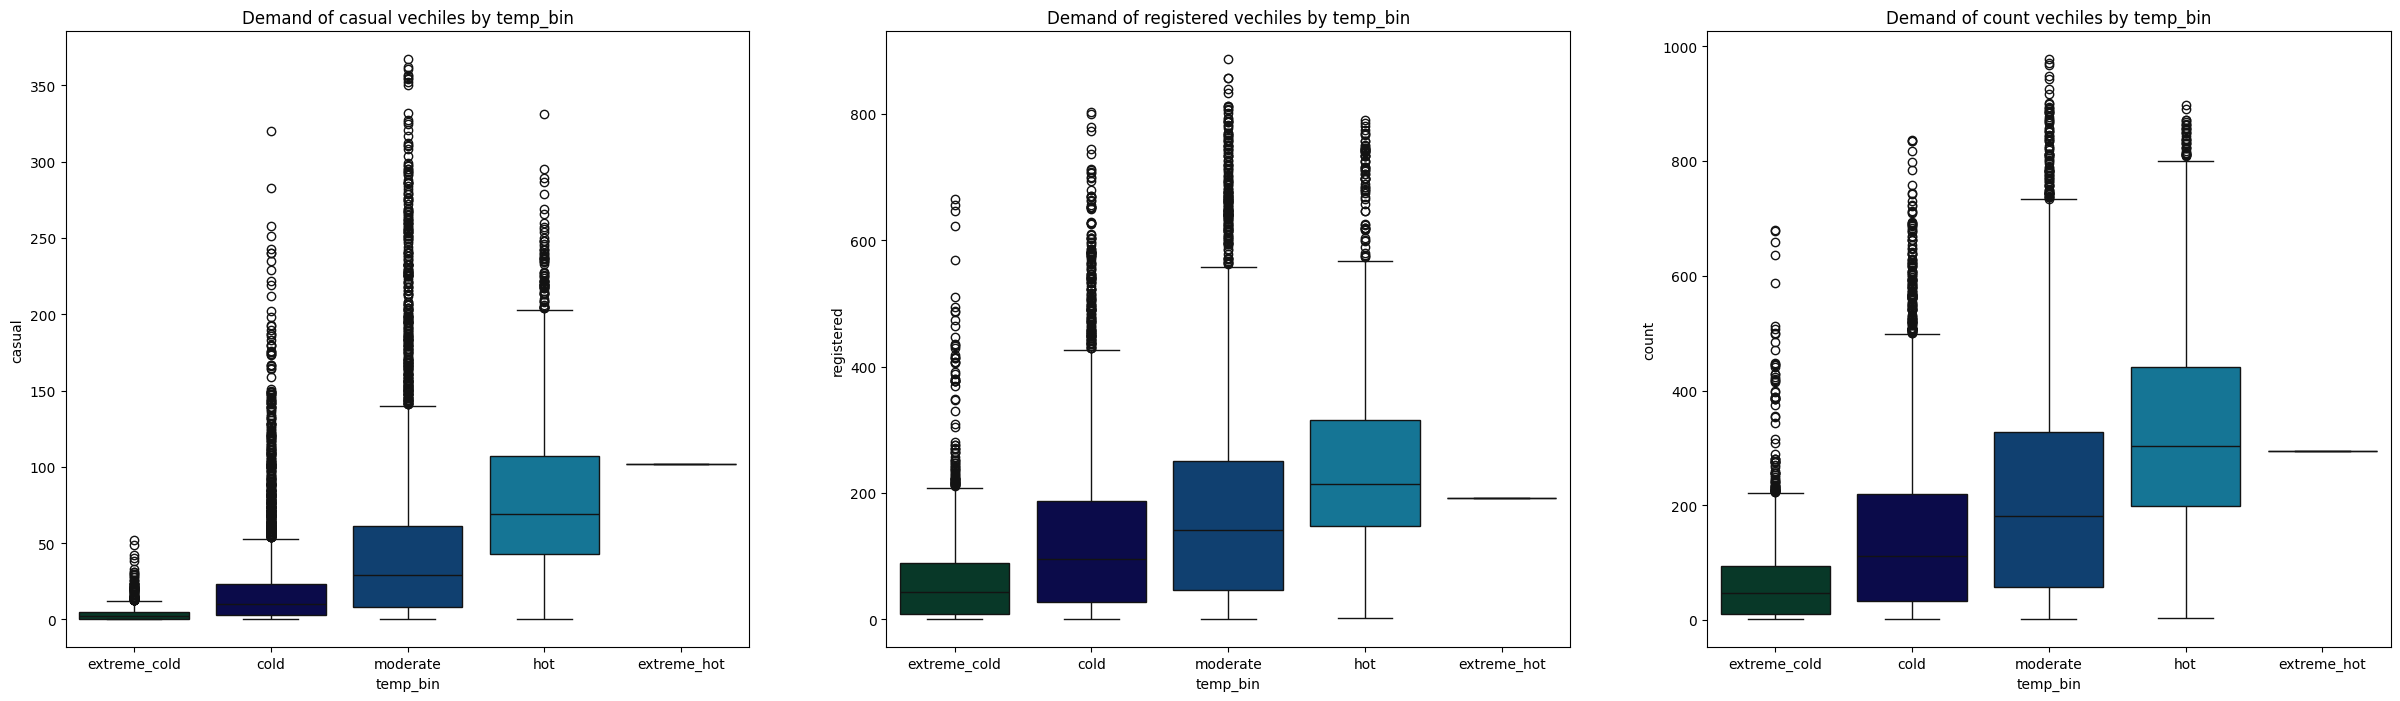

In [387]:
continous_columns = ['casual', 'registered', 'count']

fig, ax = plt.subplots(1, 3, figsize=(30, 8))
axes = ax.ravel()

for index, column in enumerate(continous_columns):
  sns.boxplot(data=dataset_copy, x='temp_bin', y=column, palette="ocean", ax=axes[index])
  axes[index].set_title(f"Demand of {column} vechiles by temp_bin", )

# Observations

## Casual Demand

1. The demand for casual vehicles is highest in hot weather (30–40 degrees Celsius), followed by moderate temperatures (20–30 degrees Celsius).

2. Very few people have casually requested it during extreme cold or extreme heat.

3. From the graph, it looks like a moderate temperature has lots of outliers, and that too in the upper IQR.

## Registered Demand

1. The graph is almost identical to the casual vehicle demand graph, with the exception that there are more data points in extreme cold.

2. The median demand in extreme hot and hot is nearly identical.

## Counted Demand

As the counted demand is the sum of casual and registered demand, the graph is also the result of the same.

<ipython-input-388-44a5e61c536b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=dataset, x="temp", y="casual", palette="tab10", kind='line', aspect=3)


Text(0.5, 1.0, 'Relationship between casual vechile demand and temperature')

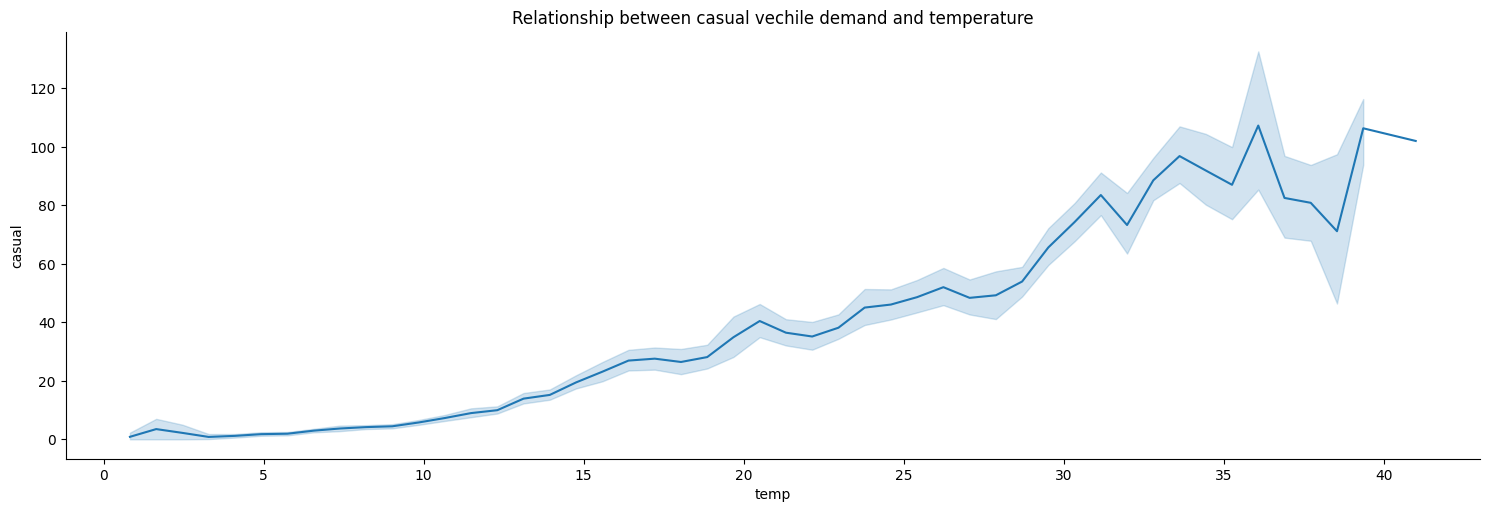

In [388]:
continous_columns = ['casual', 'registered', 'count']

sns.relplot(data=dataset, x="temp", y="casual", palette="tab10", kind='line', aspect=3)
plt.title("Relationship between casual vechile demand and temperature")

# Observations

Casual vehicle demand is linear beginning at 5 degrees Celsius and peaks at 35 and 40 degrees Celsius.

<ipython-input-389-9691968bccbf>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=dataset, x="temp", y="registered", palette="tab10", kind='line', aspect=3)


Text(0.5, 1.0, 'Relationship between registered vechile demand and temperature')

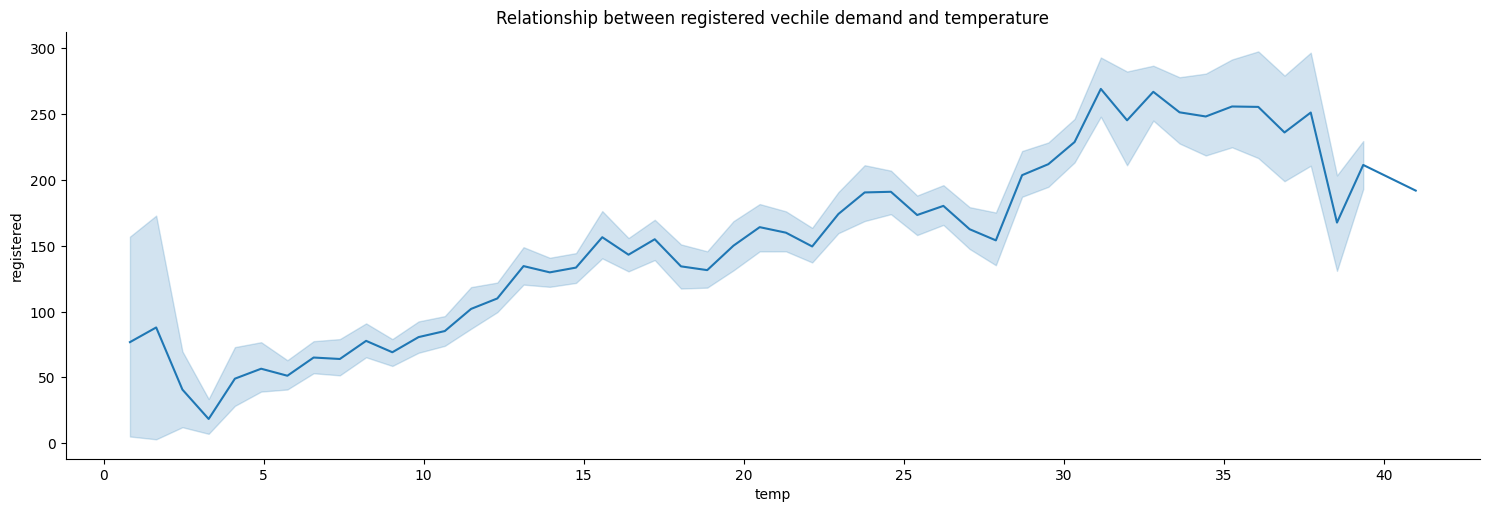

In [389]:
sns.relplot(data=dataset, x="temp", y="registered", palette="tab10", kind='line', aspect=3)
plt.title("Relationship between registered vechile demand and temperature")

# Observations

The registered demand for vehicles is linear, starting from 5 degrees Celsius to roughly 38 degrees Celsius, with a peak at 32 degrees.

<ipython-input-390-73c499dfd436>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=dataset, x="temp", y="count", palette="tab10", kind='line', aspect=3)


Text(0.5, 1.0, 'Relationship between counted vechile demand and temperature')

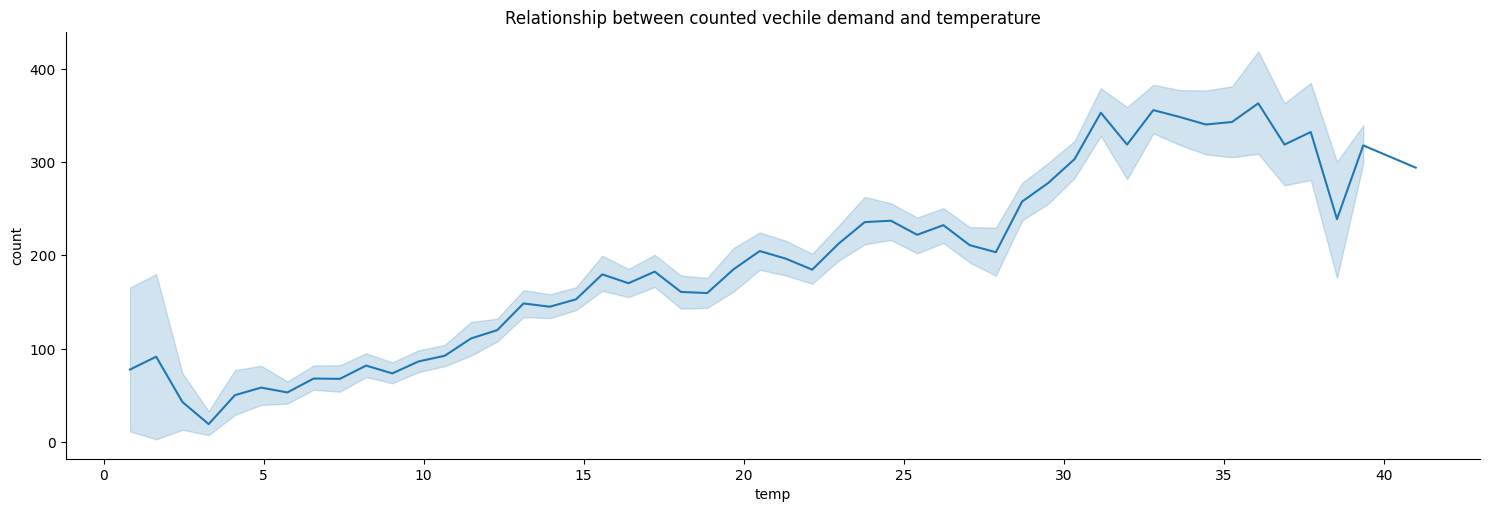

In [390]:
sns.relplot(data=dataset, x="temp", y="count", palette="tab10", kind='line', aspect=3)
plt.title("Relationship between counted vechile demand and temperature")

# Observations

The graph is nearly identical as the registered graph

<ipython-input-391-ecd1d0718909>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=dataset, x="windspeed", y="casual", palette="tab10", kind='line', aspect=3)


Text(0.5, 1.0, 'Relationship between casual vechile demand and windspeed')

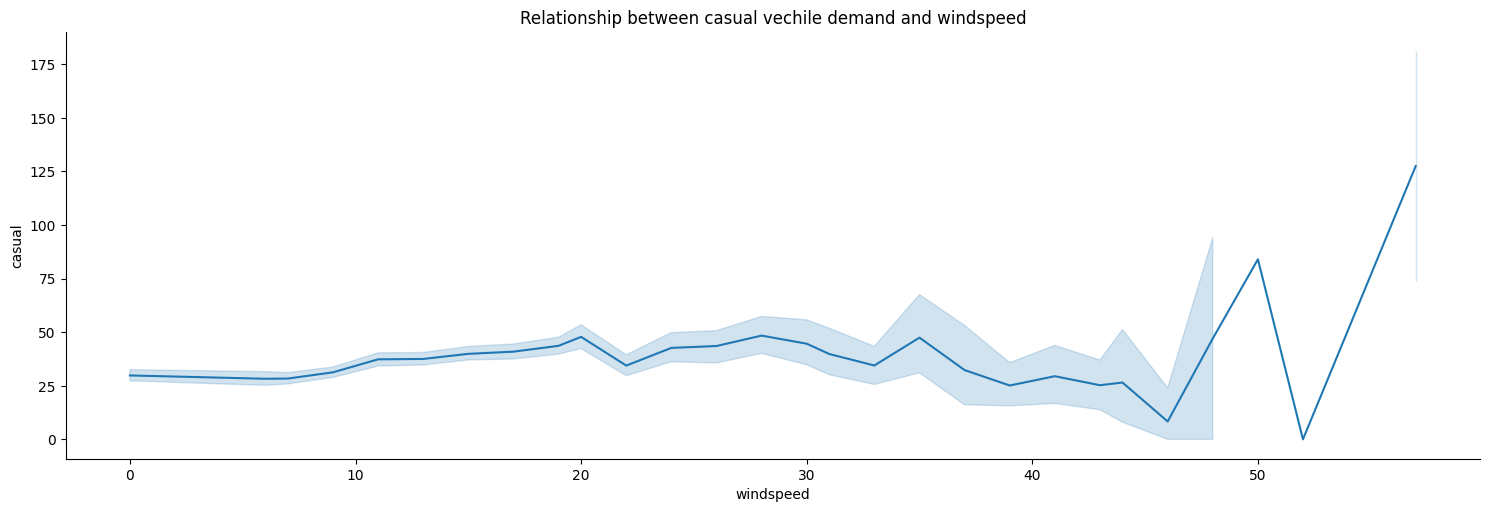

In [391]:
sns.relplot(data=dataset, x="windspeed", y="casual", palette="tab10", kind='line', aspect=3)
plt.title("Relationship between casual vechile demand and windspeed")

# Observations

Casual vehicle demand is flat for 15–30 users, with speeds ranging from 0–50.

<ipython-input-392-3649c713bab1>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=dataset, x="windspeed", y="registered", palette="tab10", kind='line', aspect=3)


Text(0.5, 1.0, 'Relationship between registered vehicle demand and windspeed')

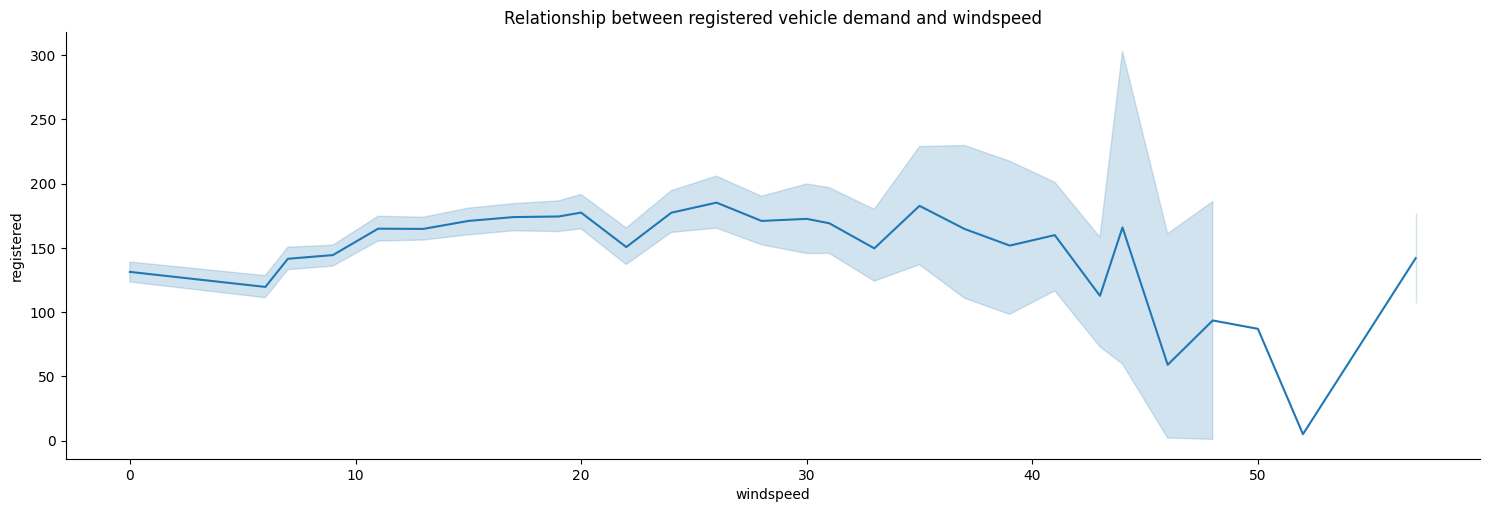

In [392]:
sns.relplot(data=dataset, x="windspeed", y="registered", palette="tab10", kind='line', aspect=3)
plt.title("Relationship between registered vehicle demand and windspeed")

# Observations

The registered vehicle demand is flat for 100-150 users at windspeeds ranging from 0–40. It starts declining from 40 onwards.

<ipython-input-393-722cb27948b7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=dataset, x="windspeed", y="count", palette="tab10", kind='line', aspect=3)


Text(0.5, 1.0, 'Relationship between counted vehicle demand and windspeed')

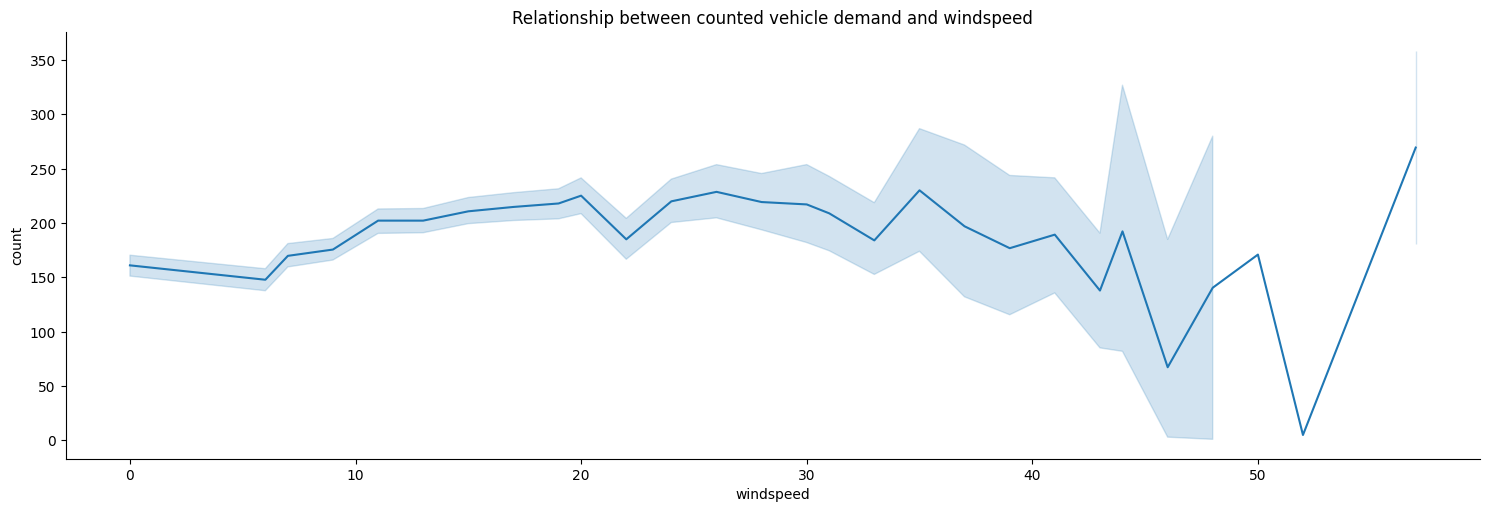

In [393]:
sns.relplot(data=dataset, x="windspeed", y="count", palette="tab10", kind='line', aspect=3)
plt.title("Relationship between counted vehicle demand and windspeed")

# Observations

Same observation as registred vechiles.

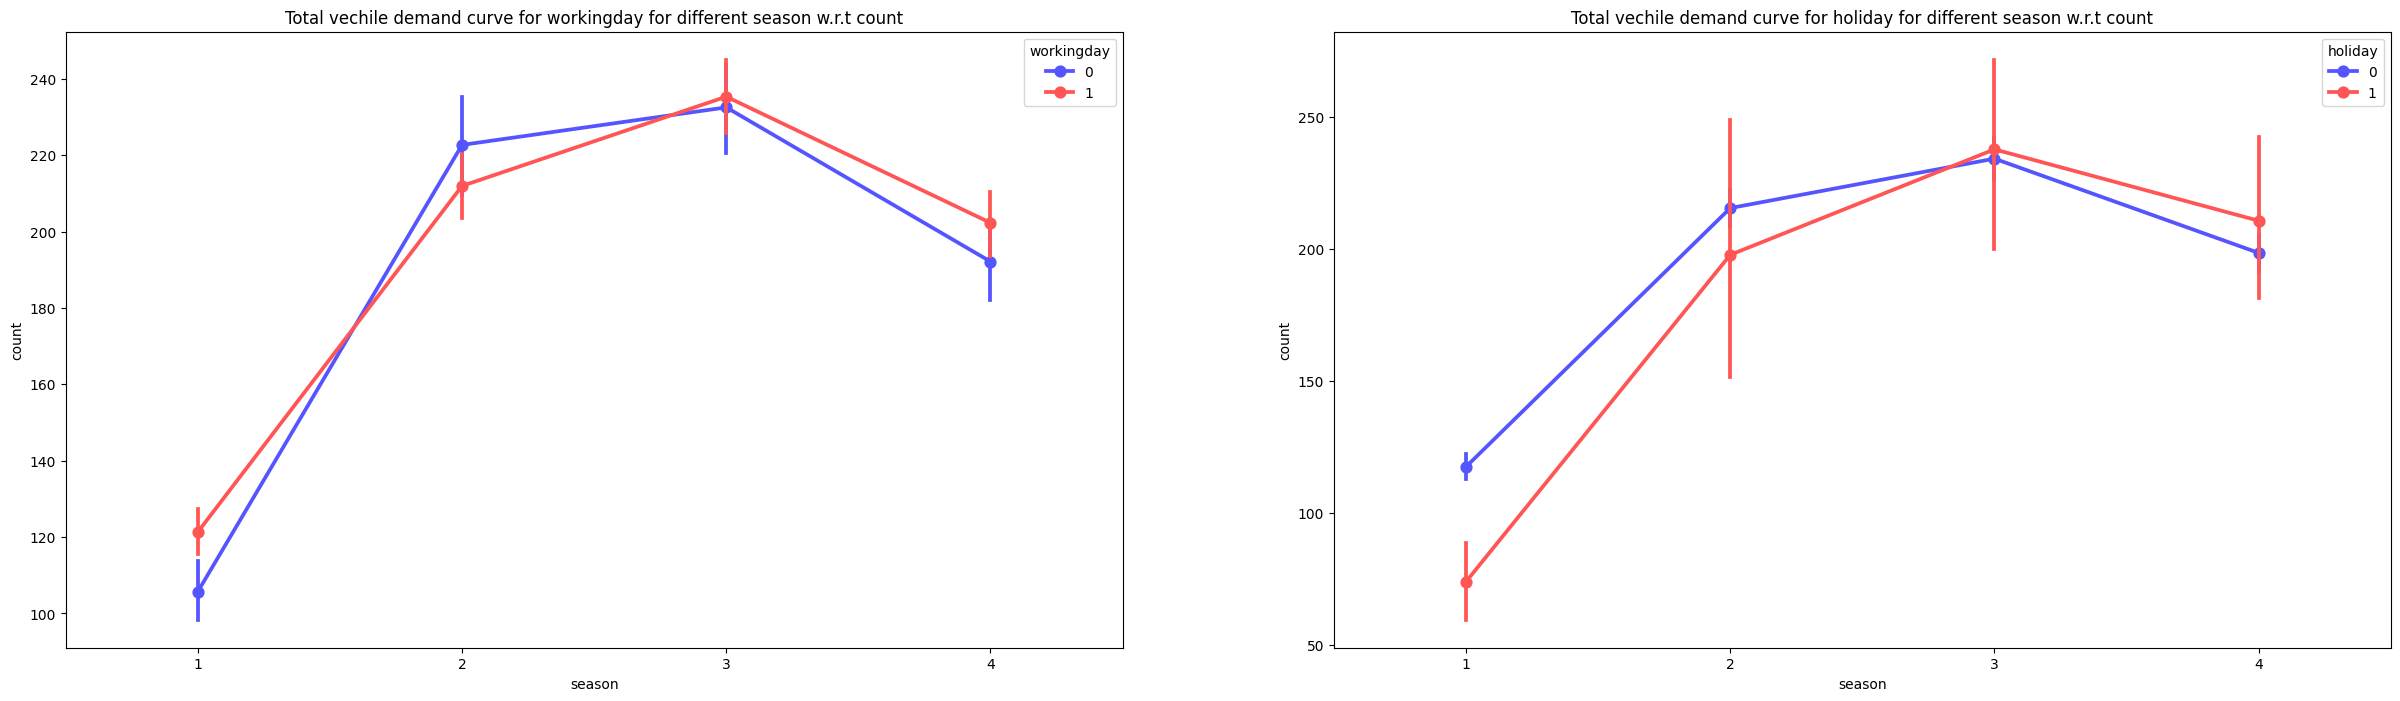

In [394]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(30, 8))
axes = ax.ravel()

for index, day in enumerate(days):
  sns.pointplot(x="season", y="count", hue=day, data=dataset, palette="seismic", ax=axes[index])
  axes[index].set_title(f"Total vechile demand curve for {day} for different season w.r.t count")

# Observations

## Working Days

1. The total demand for vehicles drastically increases from spring to summer and is constant from summer to fall.

2. The total demand is drastically reduced from fall to winter.

## Holidays

1. The total demand for vehicles for holidays and non-holidays rises in the spring and falls in the fall.

2. The total demand is slightly reduced from fall to winter.



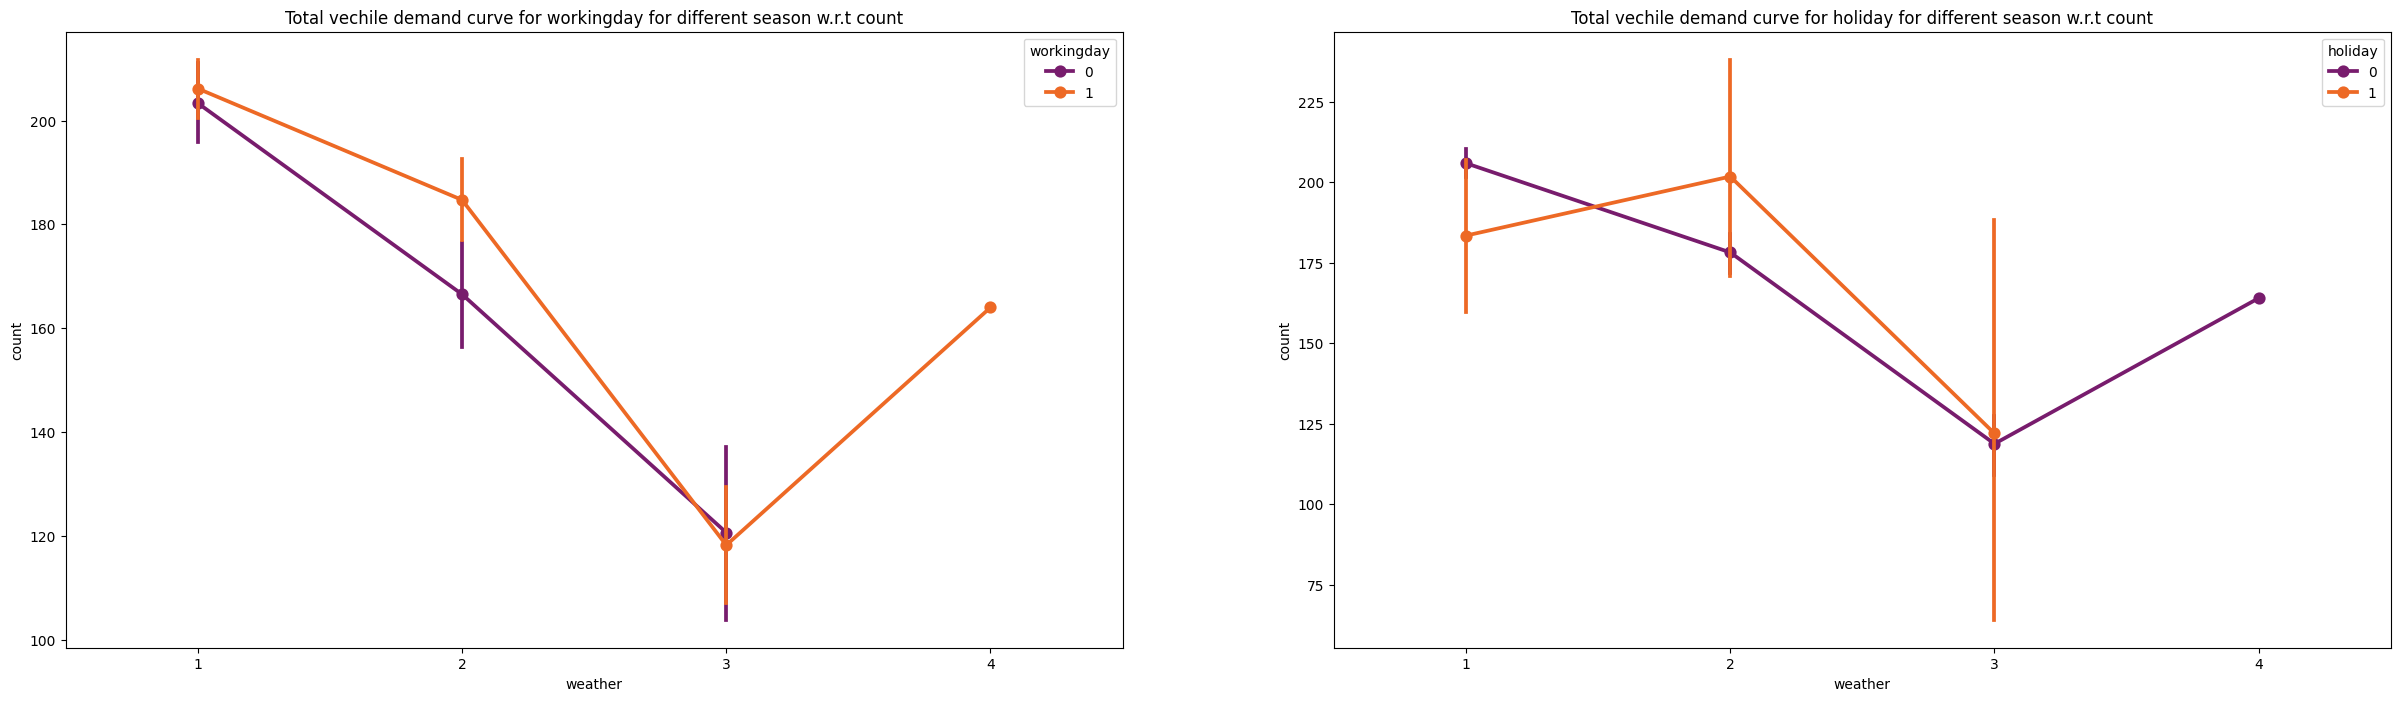

In [395]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(30, 8))
axes = ax.ravel()
for index, day in enumerate(days):
  sns.pointplot(x="weather", y="count", hue=day, data=dataset, palette="inferno", ax=axes[index])
  axes[index].set_title(f"Total vechile demand curve for {day} for different season w.r.t count")

# Observations

## Working Day

The total demand for vehicles is drastically reduced from clear skies to cloudy mist and is further reduced to light snow or light rain for both working and non-working days.

## Holiday

The total demand curve is increasing from clear skies to cloudy mist and is reduced in light snow or light rain.

The graph shows an interesting contrast between clear skies and cloudy mist during holidays and non-holidays.



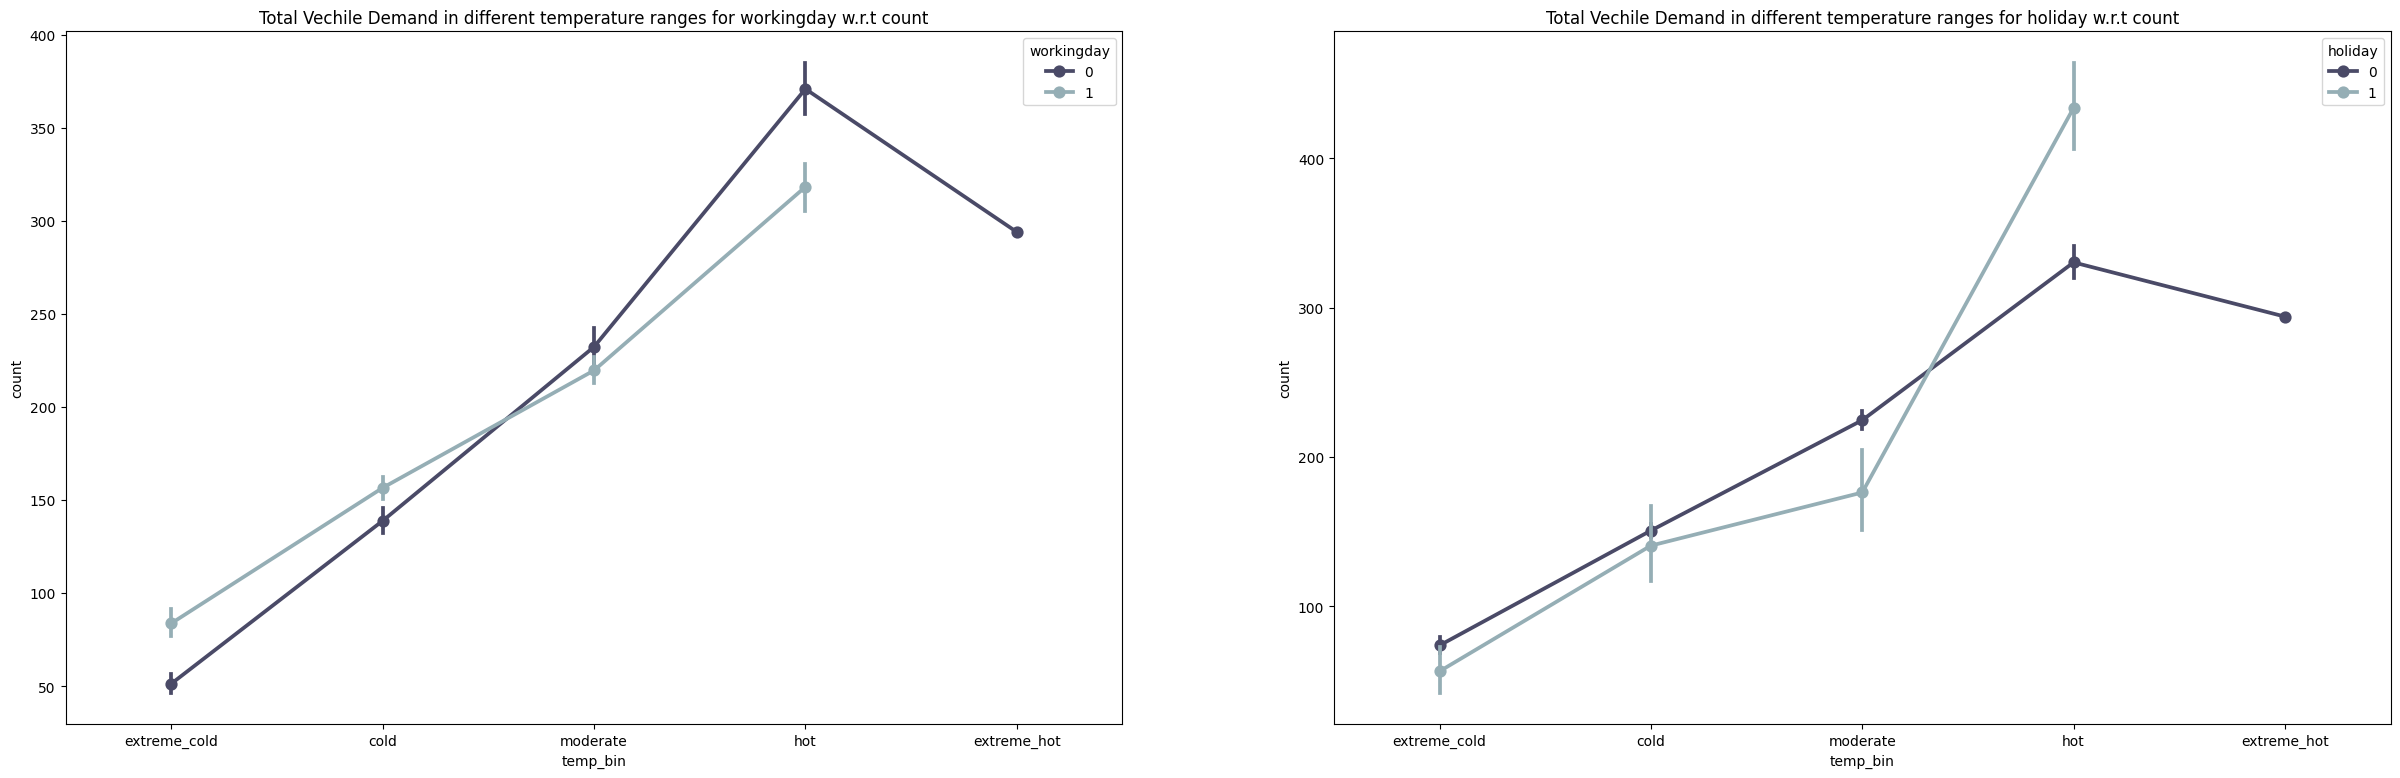

In [396]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(30, 9))
axes = ax.ravel()

for index, day in enumerate(days):
  sns.pointplot(x="temp_bin", y="count", hue=day, data=dataset_copy, palette="bone", ax=axes[index])
  axes[index].set_title(f"Total Vechile Demand in different temperature ranges for {day} w.r.t count")

# Observations

## Working Days

The total demand curve is linear for working and non-working days from extreme cold to hot. The curves for working and non-working are intersecting at a temperature between cold and moderate.

## Holidays

The total demand curve is linear and parellel for holidays and non-holidays during extreme cold to moderate temperatures. The curve has huge difference during hot temperatures.

Text(0.5, 1.0, 'Total Vechile Demand in different season for different weather')

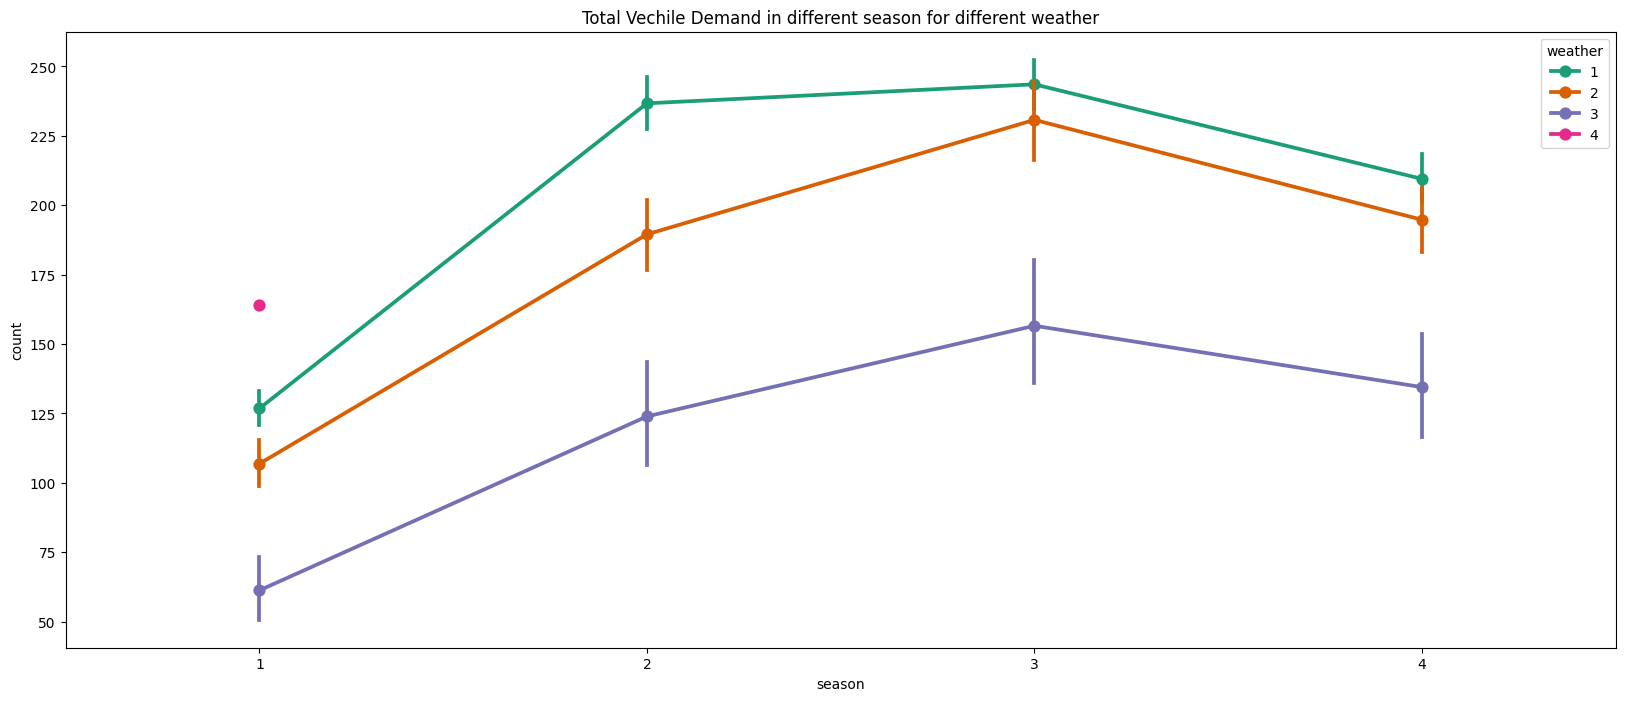

In [397]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="season", y="count", hue="weather", data=dataset_copy, palette="Dark2")
plt.title("Total Vechile Demand in different season for different weather")

# Observations

The total demand curve is linearly the same and parallel to each other during different weather conditions.

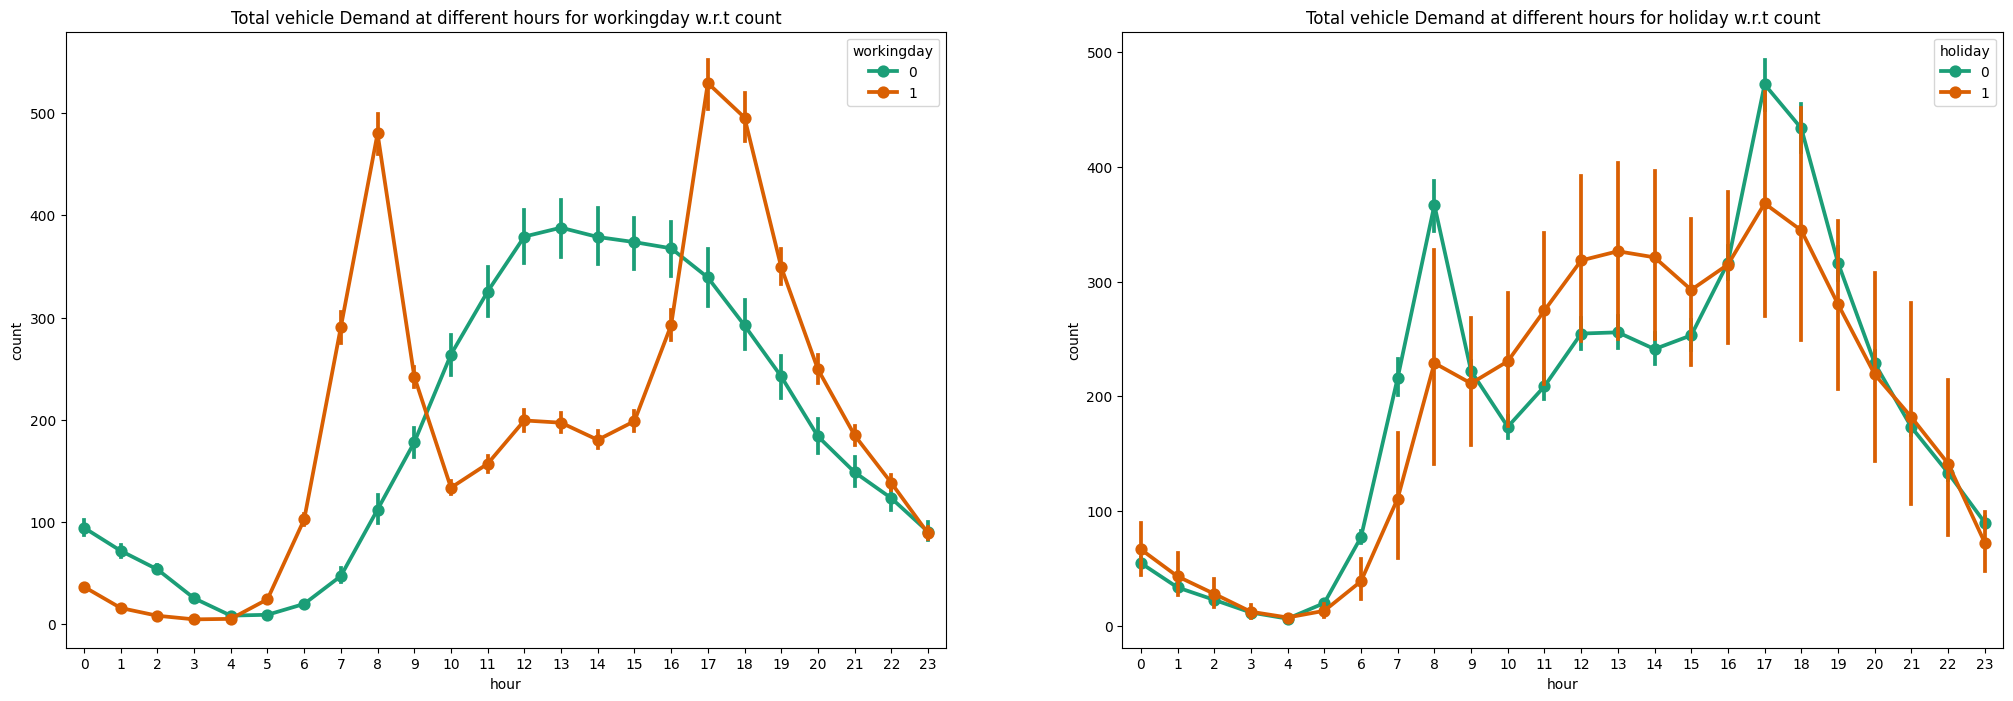

In [398]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(25, 8))
axes = ax.ravel()
for index, day in enumerate(days):
  sns.pointplot(x="hour", y="count", hue=day, data=dataset_copy, palette="Dark2", ax=axes[index])
  axes[index].set_title(f"Total vehicle Demand at different hours for {day} w.r.t count")

# Observations

## Working Day

1. The total vehicle demand curve is intersected at 5, 10, 17, and 24 hours for working and non-working day.
2. The working day curve with respect to count has two peaks, i.e., at 7.50 and the 17th hour.
3. From 10 to 16 hours, the curve difference between working and not working is enormous.

## Holiday

1. The total vehicle demand curve is nearly identical from 1–5 hours for holidays and non-holidays, and is linearly increasing from 6–8 hours, with confidence intervals (C.I) that can be seen on holidays.

2. From 8 hours onwards, the curve is facing a downward slope for non-holidays but facing an upwards slope for holidays.

3. From 17 hours onwards, both holiday and non-holiday are facing a downwards slope.

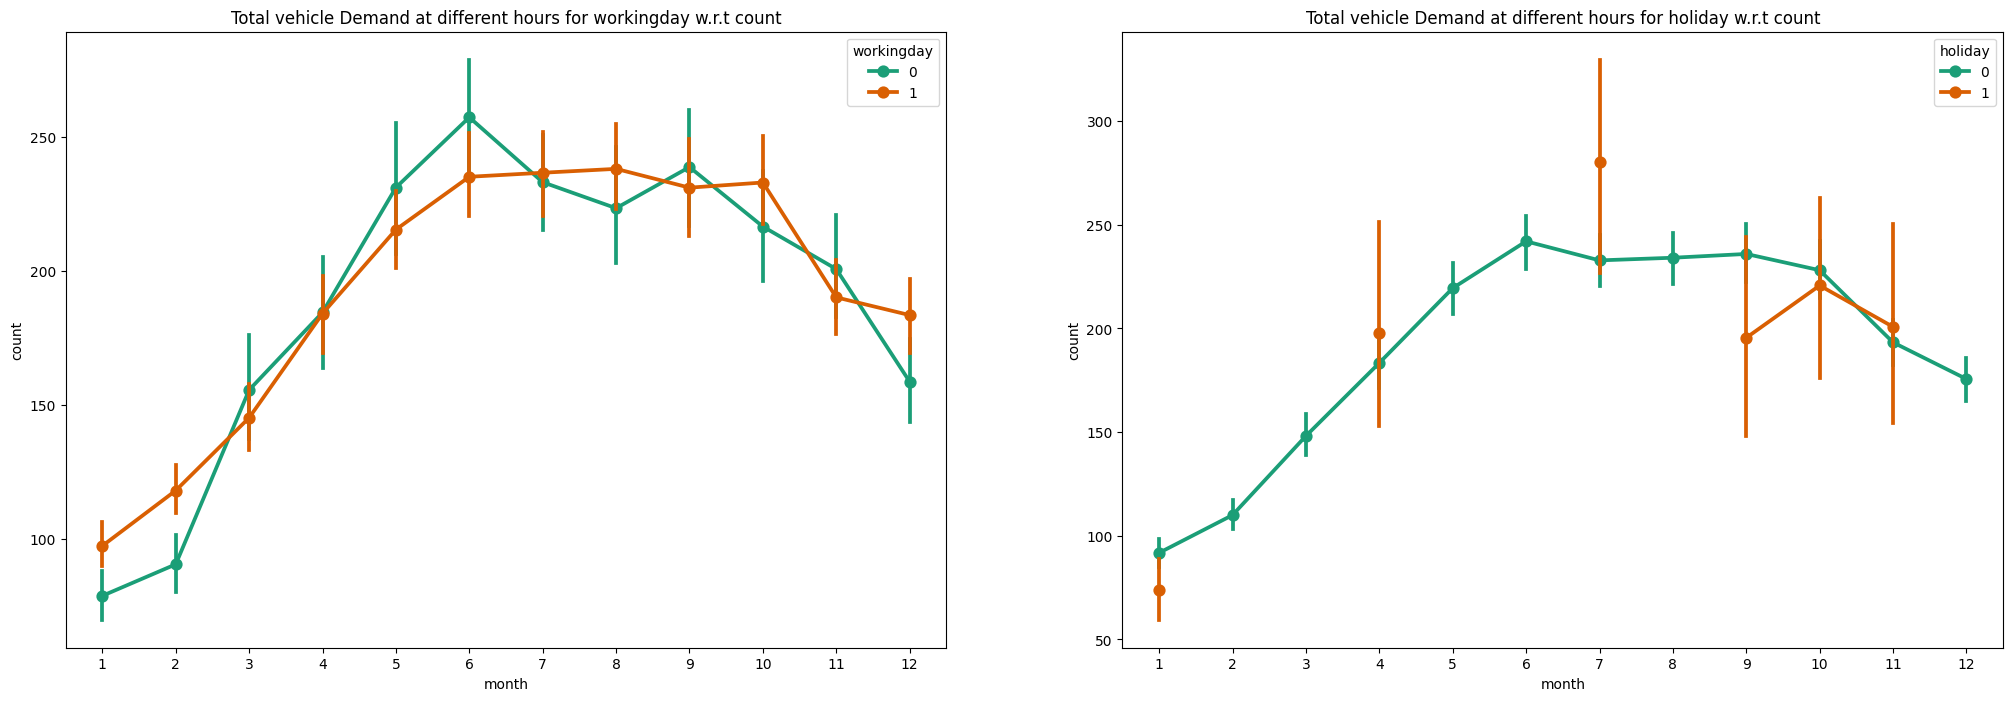

In [399]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(25, 8))
axes = ax.ravel()

for index, day in enumerate(days):
  sns.pointplot(x="month", y="count", hue=day, data=dataset_copy, palette="Dark2", ax=axes[index])
  axes[index].set_title(f"Total vehicle Demand at different hours for {day} w.r.t count")

# Statistical Tests

## 2 Sample T-Test

2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.

Assumptions of T-Test

1. The sample size should be less than 30.
2. The population variance is unknown.
3. The population mean and standard deviation are finite.
4. The means of the two populations being compared should follow normal distributions.
5. If using Student's original definition of the t-test, the two populations being compared should have the same variance. If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances.

In [400]:
from scipy.stats import ttest_ind

In [401]:
working_day_count = dataset[(dataset['workingday'] == 1)]['count']
non_working_day_count = dataset[(dataset['workingday'] == 0)]['count']

t_stat, p_value = np.round(ttest_ind(working_day_count, non_working_day_count, random_state=42), 2)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is 1.21 and p_value is 0.23


# Conclusion

This results in a p-value of 0.23, which is below the defined significance level of 5%. The T-test is therefore not significant and the NULL HYPOTHESIS is CONFIRMED.

## Analysis of Variance (ANOVA)

To check if No. of cycles rented is similar or different in different

1. Weather
2. Season

## Assumptions

1. The samples are independent.

2. Each sample is from a normally distributed population.

3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

In [402]:
from scipy.stats import f_oneway


spring_season = dataset[dataset['season'] == 1]['count']
summer_season = dataset[dataset['season'] == 2]['count']
fall_season = dataset[dataset['season'] == 3]['count']
winter_season = dataset[dataset['season'] == 4]['count']

f_stat, p_value = f_oneway(spring_season, summer_season, fall_season, winter_season)
print(f"F-test statistic is {f_stat} and p_value is {p_value}")


F-test statistic is 236.94671081032106 and p_value is 6.164843386499654e-149


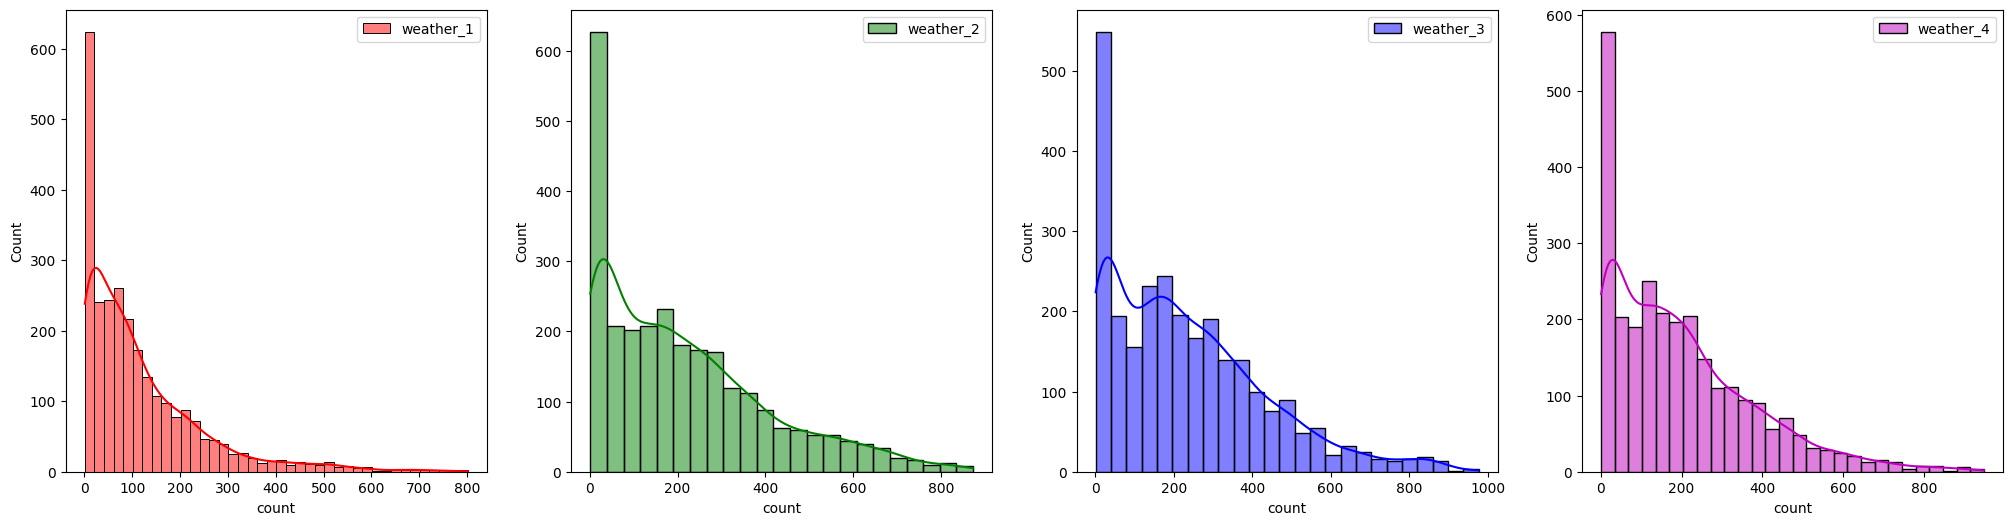

In [403]:
fig, ax = plt.subplots(1, 4, figsize=(25, 6))
axes = ax.ravel()

seasons = [1, 2, 3, 4]
colors = ['r','g','b','m']
for index, season in enumerate(seasons):
  sns.histplot(dataset[dataset['season'] == season]['count'], ax=axes[index], kde=True, color=colors[index], label=f'weather_{season}', )
  axes[index].legend()

# Observations

As we can see, the count distribution for all the seasons is not normally distributed. As a result, in order to run an ANOVA test, we must first transform into a normal distribution using the Box-Cox transformation.

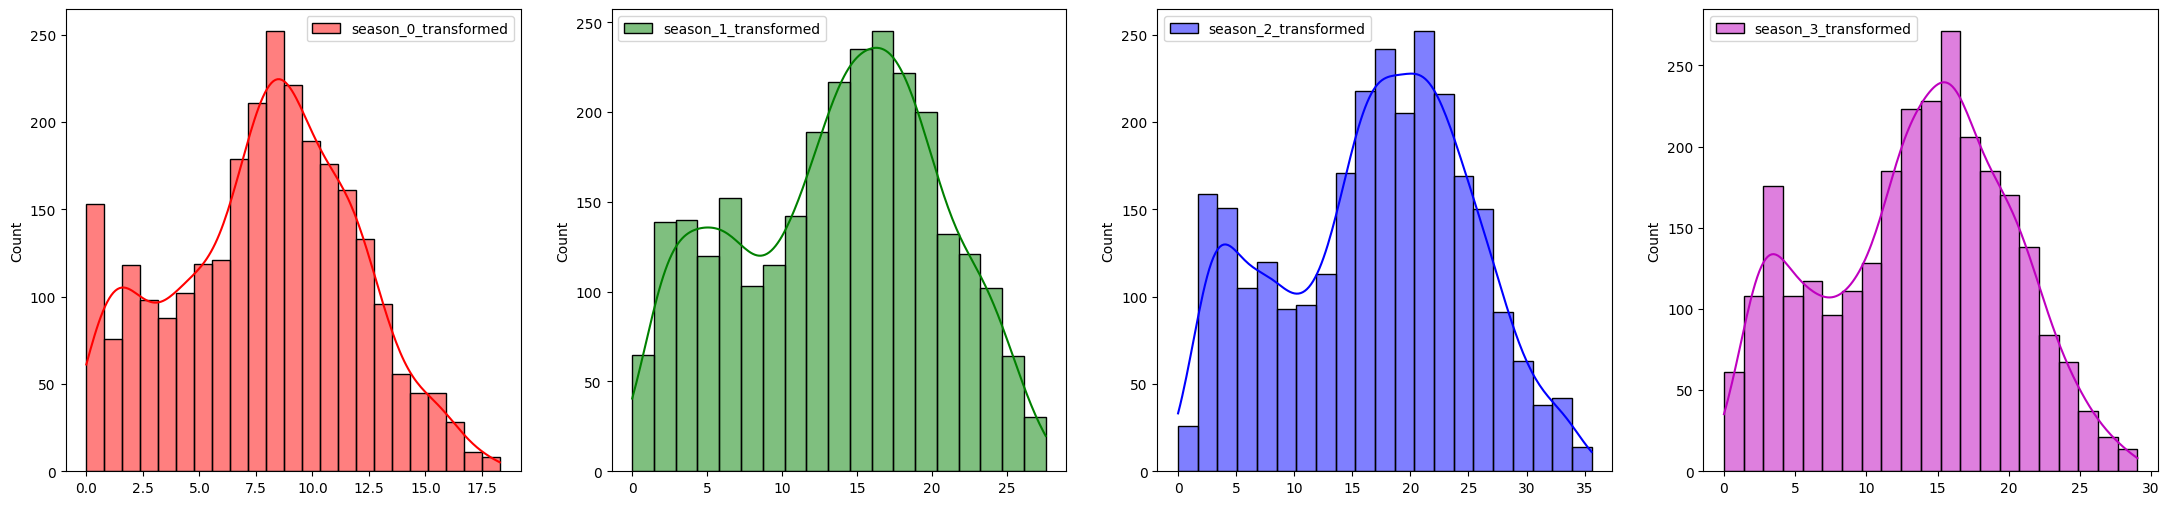

In [404]:
from scipy.stats import boxcox

season_1_transformed = boxcox(dataset[dataset['season'] == 1]['count'])
season_2_transformed = boxcox(dataset[dataset['season'] == 2]['count'])
season_3_transformed = boxcox(dataset[dataset['season'] == 3]['count'])
season_4_transformed = boxcox(dataset[dataset['season'] == 4]['count'])

fig, ax = plt.subplots(1, 4, figsize=(27, 6))
axes = ax.ravel()

transformed_seasons = [season_1_transformed, season_2_transformed, season_3_transformed, season_4_transformed]
colors = ['r','g','b', 'm']
for index, season in enumerate(transformed_seasons):
  sns.histplot(season[0], ax=axes[index], kde=True, color=colors[index], label=f'season_{index}_transformed', )
  axes[index].legend()

In [405]:
f_stat, p_value = f_oneway(season_1_transformed[0], season_2_transformed[0], season_3_transformed[0], season_4_transformed[0])
print(f"F-test statistic is {f_stat} and p_value is {p_value}")

F-test statistic is 890.4936156746095 and p_value is 0.0


# Conclusion

This results in a p-value of 0.0, which is below the defined significance level of 5%. The ANOVA test for season is therefore significant and the NULL HYPOTHESIS is NOT CONFIRMED.

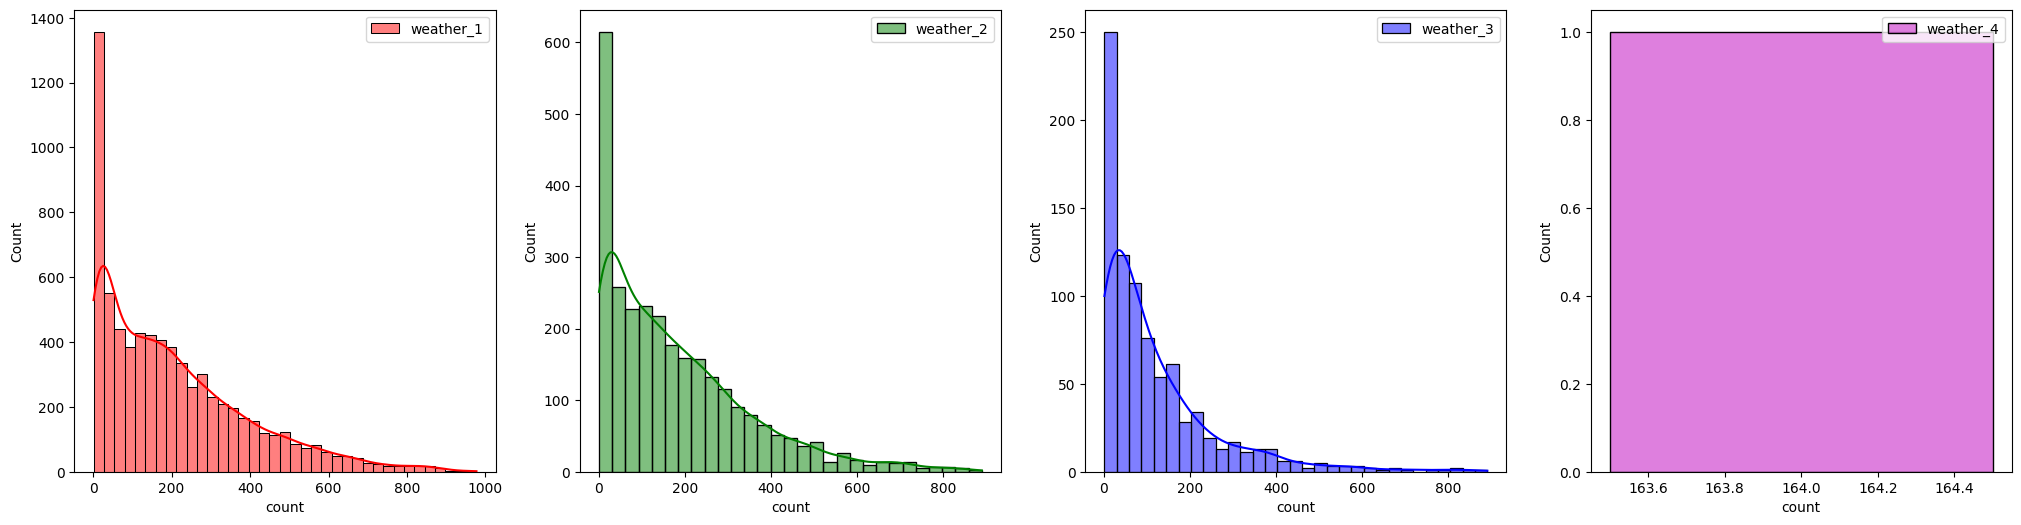

In [406]:
weather_1 = dataset[dataset['weather'] == 1]['count']
weather_2 = dataset[dataset['weather'] == 2]['count']
weather_3 = dataset[dataset['weather'] == 3]['count']
weather_4 = dataset[dataset['weather'] == 4]['count']


fig, ax = plt.subplots(1, 4, figsize=(25, 6))
axes = ax.ravel()

weathers = [1, 2, 3, 4]
colors = ['r','g','b','m']
for index, weather in enumerate(weathers):
  sns.histplot(dataset[dataset['weather'] == weather]['count'], ax=axes[index], kde=True, color=colors[index], label=f'weather_{weather}', )
  axes[index].legend()

# Observations

As we can see, the count distribution for all the weather is not normally distributed. As a result, in order to run an ANOVA test, we must first transform into a normal distribution using the Box-Cox transformation.

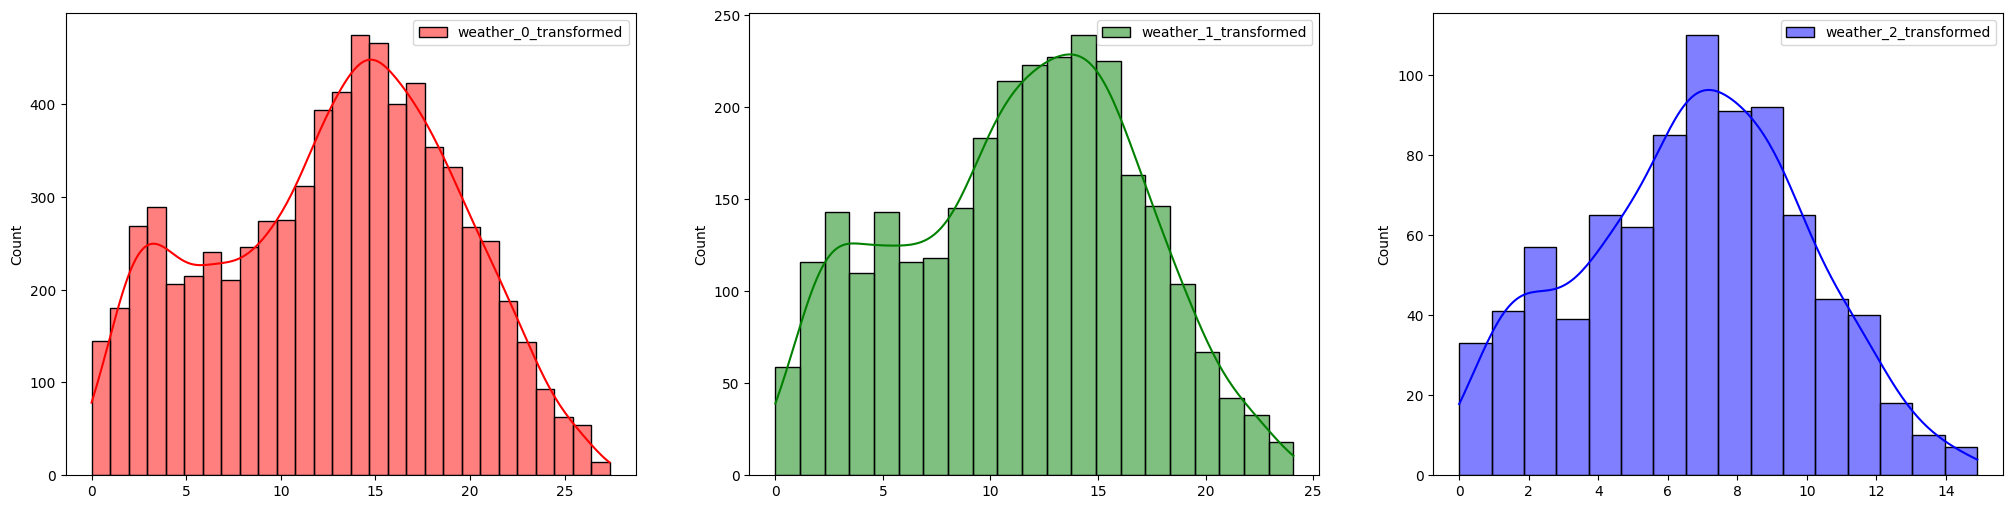

In [407]:
from scipy.stats import boxcox

weather_1_transformed = boxcox(dataset[dataset['weather'] == 1]['count'])
weather_2_transformed = boxcox(dataset[dataset['weather'] == 2]['count'])
weather_3_transformed = boxcox(dataset[dataset['weather'] == 3]['count'])

fig, ax = plt.subplots(1, 3, figsize=(25, 6))
axes = ax.ravel()

transformed_weathers = [weather_1_transformed, weather_2_transformed, weather_3_transformed]
colors = ['r','g','b']
for index, weather in enumerate(transformed_weathers):
  sns.histplot(weather[0], ax=axes[index], kde=True, color=colors[index], label=f'weather_{index}_transformed', )
  axes[index].legend()

In [408]:
f_stat, p_value = f_oneway(weather_1_transformed[0], weather_2_transformed[0], weather_3_transformed[0])
print(f"F-test statistic is {f_stat} and p_value is {p_value}")

F-test statistic is 431.79686015294686 and p_value is 3.4867243611236345e-181


# Conclusion

This results in a p-value of 3.486e-181, which is below the defined significance level of 5%. The ANNOVA test for weather is therefore significant and the NULL HYPOTHESIS is NOT CONFIRMED.

# x^2 Test

Note: An often quoted guideline for the validity of this calculation is that the test should be used only if the observed and expected frequencies in each cell are at least 5.

# Assumptions Reference

1. The data in the cells should be frequencies, or counts of cases rather than percentages or some other transformation of the data.

2. The levels (or categories) of the variables are mutually exclusive.

3. The study groups must be independent. This means that a different test must be used if the two groups are related.

4. The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one.

Null Hypothesis:
: The impact of weather is independent of seasons.

Alternative Hypothesis:
: The impact of weather has a different impact depending on the season.

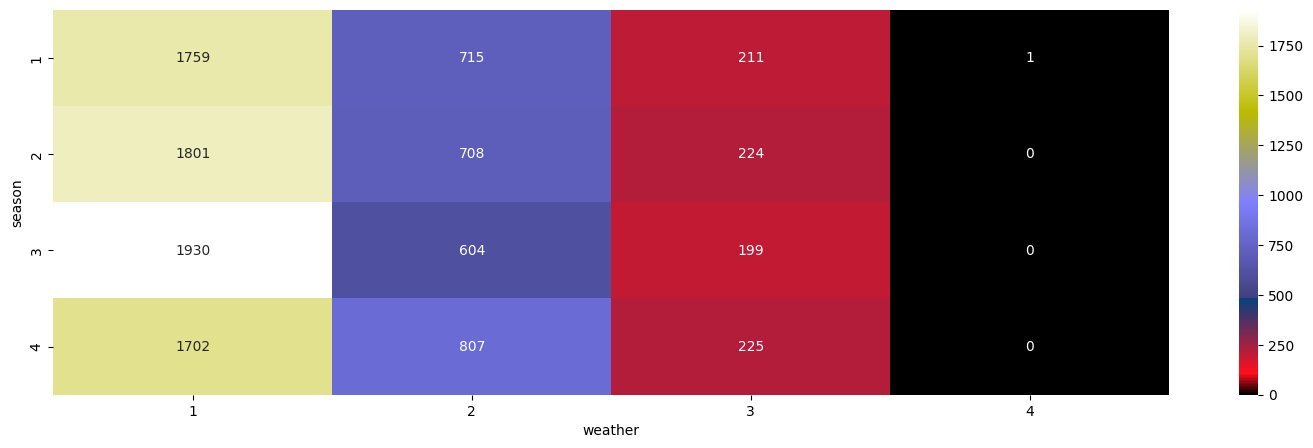

In [409]:
from scipy.stats.contingency import chi2_contingency


plt.figure(figsize=(18, 5))
contingency_table = pd.crosstab(dataset['season'], dataset['weather'])
values = np.array([contingency_table.iloc[0][:4], contingency_table.iloc[1][:4], contingency_table.iloc[2][:4]])
sns.heatmap(contingency_table, annot=True, fmt='.6g', cmap="gist_stern")
plt.show()

In [410]:
chi2_stat, p_value, dof, expected_values = chi2_contingency(values)
print(f"Chi2-test statistic is {chi2_stat} and p_value is {p_value}")

Chi2-test statistic is 23.02733254462982 and p_value is 0.0007873757080593115


This results in a p-value of 0.0007873757080593115, which is below the defined significance level of 5%. The Chi2 test is therefore significant and the NULL HYPOTHESIS is NOT CONFIRMED.

# **Insights**

1. A 2-sample T-test comparing working and non-working days in terms of user count suggests that the average counts for both groups are equivalent.
2. Conducting an ANOVA test across different seasons regarding user count reveals differences in population means, indicating seasonal variations in the use of Yulu bikes.
3. An ANOVA test across various weather conditions, excluding condition 4, concerning user count suggests uniform population means across these conditions, signifying consistent bike usage across different weather conditions.
4. A Chi2 test examining the relationship between season and weather (as categorical variables) indicates that weather patterns are influenced by the seasonal changes.
5. The median recorded temperature is 20.5 degrees Celsius, with 75% of temperatures recorded up to 26.24 degrees Celsius. The overall average temperature is measured at 20.36 degrees Celsius.
6. Yulu reports a median user count (casual plus registered) of 145, with the top 75% of observations below 284 users. The average user count is 191.574, with the highest recorded at 977.
7. 68% of the data collected represents working days, aligning with the higher public transportation use on these days.
8. Data points during light snow or light rain are notably scarce, likely reflecting reduced service use during adverse weather conditions such as heavy rain or thunderstorms.
9. The mean temperature observed is 20.23 degrees Celsius, occurring as the median value 50% of the time.
10. The highest occurrences of holidays are noted during the autumn and winter.
11. In 2011, the average total users recorded was 144, with a significant variation (standard deviation of 133), a median of 111 users, and a user count ranging from 1 to 638. In contrast, 2012 saw an average of 238.56 users with a standard deviation of 208, a median of 199, and user counts spanning from 1 to 977.
12. For October, the average total users counted was 228, with variability (standard deviation of 204), a median of 180, and a range from 1 to 948.
13. There exists a strong positive correlation between casual and total counts, and a very strong correlation between registered users and total counts.
14. The median difference in user counts between working and non-working days is slightly significant.
15. The overall demand curve increases from clear to cloudy mist conditions and decreases during light snow or light rain events.

# **Recommendations**

1. The demand for vehicles is notably reduced on non-working days and holidays. Yulu could implement special promotions on these days or organize fitness competitions using Yulu Move bikes to increase usage.
2. Given that vehicle demand is minimal from January through June, Yulu might consider promoting its services by offering discounts biweekly or weekly if a certain usage threshold is met during the month.
3. Yulu could provide personalized referral discounts that vary depending on the model of bike (Yulu Miracle, Yulu Dex, Yulu Move) selected by first-time users.
4. Bicycle usage is particularly low from midnight to 8 AM. To boost this, Yulu could attract fitness enthusiasts by offering them the chance to win exciting prizes when they use Yulu Move bikes during these hours.
5. With vehicle demand dipping in the spring, Yulu could introduce discounts during this season to encourage more people to bike.